## 2. Machine Learning for Regression


In [20]:
import pandas as pd
import numpy as np

Memanggil package pandas dan numpy

## 2.2 Data preparation

In [21]:
#data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

Menarik data dari source

In [22]:
# !wget $data 

wget merupakan fungsi alat baris perintah yang populer digunakan untuk mengunduh file dari internet.

In [23]:
df = pd.read_csv('C:\Dimas\Docs\Me\Coding\Self Learn Bootcamp\Language\Github Data\Repo\DTC-ML-Zoomcamp\Course\II. Machine Learning for Regression Model\Dataset/data.csv')

1. Menggunakan = untuk assign data yang sudah di read ke variable df
2. `pd.read_csv()` = merupakan fungsi dari pandas untuk membaca data dalam format file csv

In [24]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

 `df.columns = df.columns.str.lower().str.replace(' ', '_')`
1. `df.`fungsi untuk memanggil data frame
2. `columns` fungsi untuk memanggil atribut kolom pada data framenya
3. `str` fungsi untuk memilih data string pada kolom
4. `lower()` fungsi untuk  mengubah semua huruf menjadi kecil
5. `replace` fungsi untuk  mengganti karakter pada string


In [25]:
df['make'].str.lower().str.replace(' ', '_')

0            bmw
1            bmw
2            bmw
3            bmw
4            bmw
          ...   
11909      acura
11910      acura
11911      acura
11912      acura
11913    lincoln
Name: make, Length: 11914, dtype: object

`df['make'].str.lower().str.replace(' ', '_')`
1. `df['make']` fungsi untuk memanggil data frame dengan nama kolom `make`.
2. `.str.lower()` fungsi untuk mengubah semua karakter dalam kolom `make` menjadi huruf kecil.
3. `.str.replace(' ', '_')` fungsi untuk menggantikan semua spasi (' ') dalam nilai kolom 'make' dengan garis bawah ('_').

In [26]:
strings = list(df.dtypes[df.dtypes == 'object'].index)

`strings = list(df.dtypes[df.dtypes == 'object'].index)`
1. `strings =` fungsi untuk assign  nilai ke variabel strings
2. `list()` fungsi untuk mengubah hasil dari `df.dtypes[df.dtypes == 'object']`
3. `df.dtypes()`  fungsi untuk mendapatkan tipe data dari setiap kolom dataframe
4. `df.dtypes == 'object'` fungsi untuk memfilter kolom yang memiliki
5. `.index` fungsi untuk mengambil index dari hasil diatas


In [27]:
for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')

`for col in strings:
    df[col] = df[col].str.lower().str.replace(' ', '_')`
1. `for` fungsi  untuk mengulang kode yang sama untuk setiap kolom dalam data frame.
2. `col` adalah variabel yang digunakan untuk mengacu pada setiap kolom
3. `in` fungsi untuk  mengakses setiap kolom dalam data frame
4. `strings` fungsi untuk  mengakses setiap kolom yang merupakan string
5. `df[col]` mengacu pada kolom yang sedang diproses
6. `.str.lower()` fungsi  untuk mengubah semua karakter dalam kolom menjadi huruf kecil
7. `.str.replace(' ', '_')`  fungsi  untuk mengganti spasi dengan underscore dalam kolom



In [28]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

`df.dtypes` fungsi untuk melihat tipe data dari masing masing kolom

## 2.3 Exploratory data analysis

In [29]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

`for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()`
1. `for` Fungsi ini digunakan untuk mengulang kode yang sama untuk setiap kolom dalam DataFrame df.
2. `col` Ini adalah variabel yang digunakan untuk mengacu pada setiap kolom yang sedang diproses di dalam loop.
3. `in` Kata kunci ini digunakan untuk mengiterasi (menjalankan loop) pada elemen-elemen dalam iterable, dalam hal ini, nama kolom dari DataFrame df.
4. `df.columns` Ini mengacu pada daftar semua nama kolom dalam DataFrame df.

5. `print(col)` Fungsi ini mencetak nama kolom saat ini yang sedang diproses dalam loop.

6. `df[col].unique()` Metode ini mengembalikan nilai unik dari kolom yang sedang diproses. Ini berguna untuk melihat variasi data dalam kolom tersebut.

7. `[:5]` Ini adalah slicing yang digunakan untuk menampilkan hanya lima nilai unik pertama dari kolom.

8. `print(df[col].nunique())` Metode ini mengembalikan jumlah nilai unik dalam kolom yang sedang diproses dan mencetaknya. Ini memberikan informasi tentang variasi data dalam kolom tersebut.

9. `print()` Fungsi ini mencetak baris kosong untuk memisahkan output dari setiap kolom yang dicetak, sehingga hasilnya lebih mudah dibaca.

In [30]:
df

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


Distribution of price

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

`%matplotlib inline` adalah perintah khusus yang digunakan dalam Jupyter Notebook untuk menampilkan grafik yang dihasilkan oleh Matplotlib langsung di dalam notebook itu sendiri, alih-alih membuka jendela terpisah untuk setiap plot.

**Fungsi dan Manfaat**

1. Menyematkan Grafik Perintah ini memungkinkan grafik yang dihasilkan oleh Matplotlib disematkan langsung di bawah sel kode, sehingga memudahkan untuk melihat dan menganalisis grafik tanpa harus berpindah jendela.

2. Interaktivitas Walaupun grafik yang dihasilkan dengan `%matplotlib inline` tidak interaktif seperti yang dihasilkan oleh beberapa pustaka lainnya, hal ini tetap memungkinkan pengguna untuk dengan cepat melihat hasil visualisasi tanpa mengganggu alur kerja di dalam notebook.

3. Penyajian Data Sangat berguna dalam konteks presentasi atau dokumentasi, di mana Anda ingin menampilkan grafik bersamaan dengan analisis atau penjelasan lainnya.


<Axes: xlabel='msrp', ylabel='Count'>

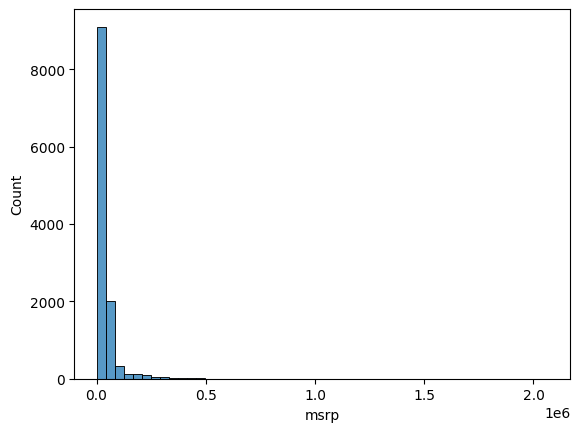

In [32]:
sns.histplot(df.msrp, bins=50)

`sns.histplot(df.msrp, bins=50)` adalah fungsi dari pustaka Seaborn yang digunakan untuk membuat histogram dari data yang ada dalam kolom `msrp` dari DataFrame `df`. Histogram adalah grafik yang menunjukkan distribusi frekuensi dari data.
1. `sns`: Ini adalah alias untuk pustaka Seaborn, yang merupakan pustaka visualisasi data berbasis Matplotlib yang memberikan antarmuka yang lebih tinggi dan lebih mudah untuk membuat visualisasi statistik.

2. `histplot`: Fungsi ini digunakan untuk membuat histogram. Histogram membagi rentang data menjadi interval (atau bin) dan menghitung jumlah observasi yang jatuh ke dalam setiap interval.

3. `df.msrp`: Ini mengacu pada kolom `msrp` dari DataFrame `df`, yang berisi data yang akan digunakan untuk membuat histogram. Biasanya, `msrp` merujuk pada harga eceran yang disarankan oleh pabrikan (Manufacturer's Suggested Retail Price).

4. `bins=50`: Parameter ini menentukan jumlah interval (atau bin) yang akan digunakan dalam histogram. Dalam hal ini, histogram akan dibagi menjadi 50 interval. Menentukan jumlah bin yang tepat penting untuk mendapatkan visualisasi yang jelas dan informatif, karena terlalu banyak atau terlalu sedikit bin dapat menyembunyikan pola dalam data.

<Axes: xlabel='msrp', ylabel='Count'>

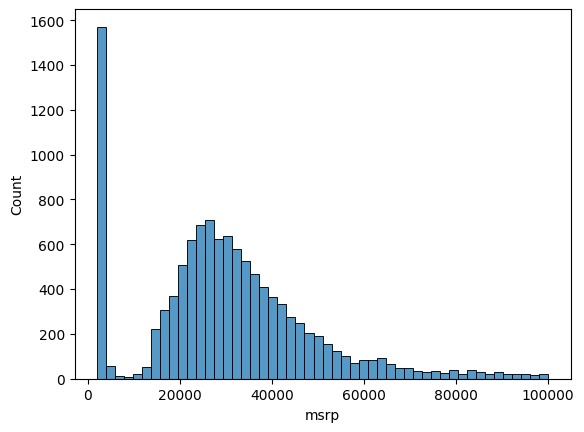

In [33]:
sns.histplot(df.msrp[df.msrp < 100000], bins=50)

`sns.histplot(df.msrp[df.msrp < 100000], bins=50)` adalah fungsi dari pustaka Seaborn yang digunakan untuk membuat histogram dari data dalam kolom `msrp` dari DataFrame `df`, tetapi hanya untuk nilai yang kurang dari 100.000. Ini membantu dalam memfokuskan analisis pada rentang harga tertentu.
1. `sns`: Ini adalah alias untuk pustaka Seaborn, yang merupakan pustaka visualisasi data berbasis Matplotlib yang menyediakan antarmuka yang lebih tinggi untuk membuat visualisasi statistik yang informatif.
2. `histplot`: Fungsi ini digunakan untuk membuat histogram, yang merupakan representasi grafis dari distribusi frekuensi dari data.
3. `df.msrp[df.msrp < 100000]`: 
   - `df.msrp` mengacu pada kolom `msrp` dari DataFrame `df`.
   - `[df.msrp < 100000]` adalah kondisi yang digunakan untuk menyaring data. Hanya nilai `msrp` yang kurang dari 100.000 yang akan digunakan untuk membuat histogram. Ini berguna untuk menghindari pengaruh nilai ekstrem atau outlier yang mungkin ada dalam dataset.
4. `bins=50`: Parameter ini menentukan jumlah interval (atau bin) yang akan digunakan dalam histogram. Dalam hal ini, histogram akan dibagi menjadi 50 interval. Pemilihan jumlah bin yang tepat penting untuk visualisasi yang jelas dan informatif.

In [34]:
np.log1p([0, 1, 10, 1000, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51293546])

`np.log1p([0, 1, 10, 1000, 100000])` adalah fungsi dari pustaka NumPy yang digunakan untuk menghitung logaritma natural (basis e) dari (1 + x) untuk setiap elemen x dalam array input. Fungsi ini sangat berguna untuk menghindari masalah numerik saat x memiliki nilai yang sangat kecil.

1. `np`: Ini adalah alias untuk pustaka NumPy, yang merupakan pustaka Python yang digunakan untuk komputasi numerik dan manipulasi array.

2. `log1p`: Fungsi ini menghitung logaritma natural dari (1 + x). Rumus matematisnya adalah:
   [text{log1p}(x) = ln(1 + x)]
   Fungsi ini memberikan hasil yang lebih akurat untuk nilai x yang mendekati 0 dibandingkan dengan menghitung (ln(x + 1)) secara langsung.

3. `[0, 1, 10, 1000, 100000]`: Ini adalah list atau array yang berisi nilai-nilai yang akan diproses oleh fungsi `log1p`. Dalam hal ini, ada lima nilai: 0, 1, 10, 1000, dan 100000.

In [35]:
np.log([0 + 1, 1+ 1, 10 + 1, 1000 + 1, 100000])

array([ 0.        ,  0.69314718,  2.39789527,  6.90875478, 11.51292546])

`np.log([0 + 1, 1 + 1, 10 + 1, 1000 + 1, 100000])` adalah fungsi dari pustaka NumPy yang digunakan untuk menghitung logaritma natural (basis e) dari setiap elemen dalam array input.
1. `np`: Ini adalah alias untuk pustaka NumPy, yang merupakan pustaka Python yang populer untuk komputasi numerik dan manipulasi array.

2. `log`: Fungsi ini menghitung logaritma natural (logaritma dengan basis e) dari nilai-nilai dalam array input. Logaritma natural adalah logaritma dengan basis konstanta Euler (e ≈ 2.718).

3. `[0 + 1, 1 + 1, 10 + 1, 1000 + 1, 100000]`: Ini adalah list yang berisi nilai-nilai yang akan dihitung logaritmanya. Perhitungan di dalam list tersebut adalah:
   - `0 + 1` = 1
   - `1 + 1` = 2
   - `10 + 1` = 11
   - `1000 + 1` = 1001
   - `100000` (tidak ada penambahan di sini)

In [36]:
price_logs = np.log1p(df.msrp)

`price_logs = np.log1p(df.msrp)` digunakan untuk membuat array atau kolom baru yang berisi logaritma natural dari (1 + msrp) untuk setiap nilai dalam kolom `msrp` dari DataFrame `df`. Fungsi ini berguna untuk transformasi logaritmik, terutama dalam menangani data dengan nilai-nilai yang sangat kecil atau nol.
1. `price_logs`: Ini adalah variabel baru yang menyimpan hasil dari transformasi logaritmik pada kolom `msrp`.
2. `np`: Alias untuk pustaka NumPy, yang menyediakan berbagai fungsi untuk komputasi numerik, termasuk operasi logaritma.
3. `log1p`: Fungsi dari NumPy yang menghitung logaritma natural dari (1 + x) untuk setiap elemen x dalam array atau kolom. Fungsi ini digunakan untuk menghindari masalah ketika x mendekati nol karena menghitung \(\ln(1 + x)\) memberikan hasil yang lebih stabil secara numerik dibandingkan langsung menghitung \(\ln(x)\) ketika x sangat kecil atau nol.
4. `df.msrp`: Ini mengacu pada kolom `msrp` dalam DataFrame `df`, yang berisi harga-harga produk (dalam konteks tertentu, MSRP mengacu pada "Manufacturer's Suggested Retail Price").

<Axes: xlabel='msrp', ylabel='Count'>

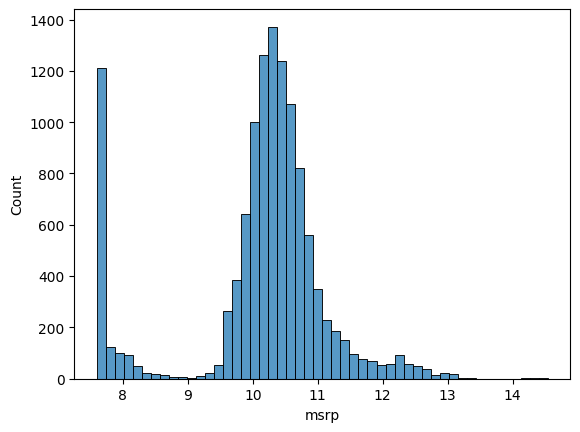

In [37]:

sns.histplot(price_logs, bins=50)

`sns.histplot(price_logs, bins=50)` digunakan untuk membuat histogram dari data `price_logs` dengan menggunakan pustaka Seaborn. Histogram ini akan menunjukkan distribusi frekuensi dari nilai-nilai `price_logs`, yang merupakan hasil transformasi logaritmik dari harga (msrp).
1. `sns`: Alias untuk pustaka Seaborn, yang digunakan untuk visualisasi data. Seaborn dibangun di atas Matplotlib dan menyediakan grafik statistik yang lebih informatif dan estetik.
2. `histplot`: Fungsi dari Seaborn untuk membuat histogram. Histogram adalah jenis grafik yang menampilkan distribusi frekuensi dari data dalam bentuk bar.
3. `price_logs`: Ini adalah array atau Series yang berisi nilai-nilai logaritma natural dari (1 + msrp), yang sebelumnya dihitung menggunakan fungsi `np.log1p(df.msrp)`.
4. `bins=50`: Argumen `bins` menentukan jumlah bar atau kelompok yang digunakan untuk membagi data dalam histogram. Dalam hal ini, histogram akan memiliki 50 bin. Jumlah bin dapat memengaruhi cara distribusi data divisualisasikan; lebih banyak bin berarti histogram lebih terperinci, tetapi mungkin terlihat lebih "berisik."


Missing values

In [38]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

`df.isnull().sum()` digunakan untuk menghitung jumlah nilai yang hilang atau **null** (NaN) di setiap kolom dalam DataFrame `df`. Perintah ini sangat berguna dalam eksplorasi data untuk mengetahui apakah ada data yang tidak lengkap.
1. `df`: Ini mengacu pada DataFrame tempat kita ingin memeriksa data yang hilang.
2. `isnull()`: Fungsi dari pustaka **pandas** yang mengembalikan DataFrame Boolean di mana setiap nilai di DataFrame diganti dengan `True` jika nilai tersebut **null** (hilang/NaN), dan `False` jika nilai tersebut bukan null.
3. `sum()`: Setelah mendapatkan DataFrame Boolean dari `isnull()`, fungsi `sum()` digunakan untuk menjumlahkan nilai `True` di sepanjang setiap kolom. Karena `True` dihitung sebagai 1 dan `False` dihitung sebagai 0, maka `sum()` akan menghasilkan jumlah nilai yang hilang di setiap kolom.

## 2.4 Setting up the validation framework

Let's draw it

In [39]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

`n = len(df)`

`n_val = int(n * 0.2)`

`n_test = int(n * 0.2)`

`n_train = n - n_val - n_test`


Perintah ini digunakan untuk membagi dataset menjadi tiga bagian: set pelatihan (train), validasi (validation), dan pengujian (test). Pembagian dataset ini penting dalam proses pengembangan model machine learning untuk memastikan bahwa model dilatih, divalidasi, dan diuji dengan data yang berbeda untuk menghindari overfitting dan untuk mengevaluasi kinerja model secara objektif.
1. `n = len(df)`:
   - `n` adalah jumlah total baris dalam DataFrame `df`.
   - Fungsi `len(df)` digunakan untuk mendapatkan jumlah total baris dalam dataset.

2. `n_val = int(n * 0.2)`:
   - `n_val` adalah jumlah data yang akan dialokasikan untuk set validasi.
   - Perhitungan ini menggunakan 20% dari total data (`n * 0.2`), kemudian diubah menjadi bilangan bulat dengan fungsi `int()`.

3. `n_test = int(n * 0.2)`:
   - `n_test` adalah jumlah data yang akan digunakan untuk set pengujian.
   - Sama seperti validasi, pengujian juga mendapatkan 20% dari total data.

4. `n_train = n - n_val - n_test`:
   - `n_train` adalah jumlah data yang digunakan untuk set pelatihan.
   - Ini adalah sisa data setelah dialokasikan untuk validasi dan pengujian, yaitu total data dikurangi data untuk validasi dan pengujian.


In [40]:
n

11914

In [41]:
n_val, n_test, n_train

(2382, 2382, 7150)

: 

`n_val` `n_test` `n_train`

1. `n_val`:
   - `n_val` adalah jumlah data yang akan dialokasikan untuk set validasi.
   - Ini dihitung sebagai proporsi dari total data, dalam hal ini 20% dari dataset (`n * 0.2`).
   - Fungsi `int()` digunakan untuk memastikan hasilnya adalah bilangan bulat.
2. `n_test`:
   - `n_test` adalah jumlah data yang akan dialokasikan untuk set pengujian.
   - Sama seperti validasi, data pengujian juga dialokasikan sebesar 20% dari total dataset (`n * 0.2`).
   - Fungsi `int()` juga digunakan untuk memastikan hasilnya adalah bilangan bulat.
3. `n_train`:
   - `n_train` adalah jumlah data yang dialokasikan untuk set pelatihan.
   - Nilai `n_train` dihitung sebagai sisa data setelah dialokasikan untuk validasi dan pengujian, yaitu `n - n_val - n_test`.

In [24]:
df.iloc[[10, 0, 3, 5]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10,bmw,1_series,2013,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,39600
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
5,bmw,1_series,2012,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,31200


`df.iloc[[10, 0, 3, 5]]`

Perintah ini digunakan untuk memilih baris tertentu dari sebuah DataFrame `df` menggunakan index-based selection atau integer-location based indexing.

1. `df.iloc[]`:
   - Fungsi `iloc` digunakan untuk memilih baris atau kolom berdasarkan index atau posisi integer dalam DataFrame.
   - Ini berbeda dengan `loc[]` yang menggunakan label atau nama kolom/baris.
   
2. `[10, 0, 3, 5]`:
   - Di dalam tanda kurung siku `[]`, ini adalah daftar indeks integer dari baris yang ingin dipilih.
   - Dalam contoh ini, baris ke-10, 0, 3, dan 5 akan dipilih dari DataFrame `df`.
   - Urutan baris sesuai dengan yang diindeks di dalam list, meskipun tidak berurutan.

- `df.iloc[[10, 0, 3, 5]]` akan mengembalikan baris ke-10, ke-0, ke-3, dan ke-5 dari DataFrame `df` dalam urutan yang diberikan.
- Metode ini berguna saat ingin mengekstrak beberapa baris secara spesifik berdasarkan urutan indeksnya, bukan berdasarkan nilai atau kondisi tertentu.


In [25]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train+n_val]
df_test = df.iloc[n_train+n_val:]

`df_train = df.iloc[:n_train]`
`df_val = df.iloc[n_train:n_train+n_val]`
`df_test = df.iloc[n_train+n_val:]`

Perintah ini digunakan untuk membagi DataFrame `df` menjadi tiga subset: set pelatihan (training set), set validasi (validation set), dan set pengujian (test set) berdasarkan indeks yang telah dihitung sebelumnya.
1. `df_train`:
   - `df_train = df.iloc[:n_train]` digunakan untuk memilih baris dari indeks 0 hingga `n_train - 1`.
   - Ini berarti bahwa `df_train` berisi semua data untuk set pelatihan.
   - Jika `n_train` adalah 600, maka `df_train` akan berisi baris dari 0 hingga 599.
2. `df_val`:
   - `df_val = df.iloc[n_train:n_train+n_val]` digunakan untuk memilih baris dari `n_train` hingga `n_train + n_val - 1`.
   - Ini berarti bahwa `df_val` berisi data untuk set validasi.
   - Jika `n_train` adalah 600 dan `n_val` adalah 200, maka `df_val` akan berisi baris dari 600 hingga 799.
3. `df_test`:
   - `df_test = df.iloc[n_train+n_val:]` digunakan untuk memilih semua baris mulai dari `n_train + n_val` hingga akhir DataFrame.
   - Ini berarti bahwa `df_test` berisi data untuk set pengujian.
   - Menggunakan contoh sebelumnya, jika `n_train` adalah 600 dan `n_val` adalah 200, maka `df_test` akan berisi baris dari 800 hingga akhir.
- Pembagian ini penting dalam machine learning untuk memastikan bahwa model dapat dilatih, divalidasi, dan diuji dengan data yang berbeda.
- Dengan membagi dataset menjadi tiga bagian, kita dapat melakukan tuning pada model menggunakan set validasi dan kemudian mengevaluasi kinerja model akhir pada set pengujian yang terpisah.


In [26]:
idx = np.arange(n)

`idx = np.arange(n)`

Perintah ini digunakan untuk membuat array NumPy yang berisi deretan angka dari 0 hingga `n - 1`.
1. `np.arange(n)`:
   - Fungsi `np.arange()` adalah fungsi dari library NumPy yang digunakan untuk menghasilkan array berisi angka dengan interval tertentu.
   - Dalam hal ini, fungsi `np.arange(n)` menghasilkan array dengan nilai dari 0 hingga `n - 1`.

2. `idx`:
   - `idx` adalah variabel yang digunakan untuk menyimpan hasil dari fungsi `np.arange(n)`.
   - Variabel ini dapat digunakan untuk indeksasi atau sebagai pengenal dalam berbagai operasi pada array atau DataFrame.


In [27]:
np.random.seed(2)
np.random.shuffle(idx)

`np.random.seed(2)` dan `np.random.shuffle(idx)`

Perintah ini digunakan untuk mengatur pengacakan (randomness) dan melakukan pengacakan pada array `idx`.
1. `np.random.seed(2)`:
   - Fungsi `np.random.seed()` digunakan untuk mengatur "seed" atau benih dari generator angka acak NumPy.
   - Dengan mengatur seed ke nilai tertentu, kita dapat memastikan bahwa hasil pengacakan yang dihasilkan dapat direproduksi. Artinya, setiap kali kita menjalankan kode ini dengan seed yang sama, kita akan mendapatkan urutan angka acak yang sama.
   - Dalam contoh ini, seed diatur ke 2.
2. `np.random.shuffle(idx)`:
   - Fungsi `np.random.shuffle()` digunakan untuk mengacak urutan elemen dalam array `idx` secara in-place, artinya elemen dalam array akan diubah urutannya tanpa membuat salinan baru.
   - Setelah menjalankan perintah ini, elemen dalam `idx` akan diacak.

- Mengatur seed sebelum melakukan pengacakan berguna dalam konteks penelitian dan pengembangan model, di mana kita perlu hasil yang konsisten untuk tujuan evaluasi.
- Mengacak indeks sering digunakan dalam pembagian dataset untuk pelatihan dan pengujian model machine learning, sehingga model tidak terlatih pada urutan data tertentu.


In [28]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

`df_train`, `df_val`, dan `df_test`

Perintah ini digunakan untuk membagi DataFrame `df` menjadi tiga subset: set pelatihan (training set), set validasi (validation set), dan set pengujian (test set) berdasarkan indeks yang telah diacak sebelumnya dengan menggunakan `idx`.
1. `df_train`:
   - `df_train = df.iloc[idx[:n_train]]` digunakan untuk memilih baris dari DataFrame `df` berdasarkan indeks acak yang disimpan dalam `idx`.
   - Dengan menggunakan `idx[:n_train]`, kita memilih baris dari indeks acak yang akan digunakan untuk set pelatihan.
   - Jika `n_train` adalah 600, maka `df_train` akan berisi semua data untuk set pelatihan dari indeks yang diacak.
2. `df_val`:
   - `df_val = df.iloc[idx[n_train:n_train+n_val]]` digunakan untuk memilih baris dari DataFrame `df` untuk set validasi.
   - Dengan menggunakan `idx[n_train:n_train+n_val]`, kita memilih baris dari indeks acak yang berfungsi sebagai set validasi.
   - Jika `n_train` adalah 600 dan `n_val` adalah 200, maka `df_val` akan berisi data dari indeks yang sesuai.
3. `df_test`:
   - `df_test = df.iloc[idx[n_train+n_val:]]` digunakan untuk memilih semua baris dari DataFrame `df` yang akan digunakan untuk set pengujian.
   - Dengan menggunakan `idx[n_train+n_val:]`, kita memilih baris dari indeks acak untuk set pengujian.
   - Menggunakan contoh sebelumnya, jika `n_train` adalah 600 dan `n_val` adalah 200, maka `df_test` akan berisi baris dari indeks yang tersisa.
- Pembagian ini penting dalam machine learning untuk memastikan bahwa model dapat dilatih, divalidasi, dan diuji dengan data yang berbeda.
- Menggunakan indeks acak memastikan bahwa pemilihan data untuk setiap subset adalah acak dan tidak terpengaruh oleh urutan data awal.


In [29]:
df_train.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260


`df_train.head()`

Perintah ini digunakan untuk menampilkan beberapa baris teratas dari DataFrame `df_train`.
1. `df_train`:
   - Merupakan subset DataFrame yang berisi data untuk set pelatihan. Subset ini dihasilkan dari pemisahan DataFrame asli `df` menggunakan indeks acak.  
2. `.head()`:
   - Fungsi `.head()` adalah metode dari pandas DataFrame yang digunakan untuk menampilkan sejumlah baris pertama dari DataFrame.
   - Secara default, fungsi ini menampilkan 5 baris pertama, tetapi kita juga dapat memberikan argumen untuk menampilkan jumlah baris yang diinginkan.
- Perintah ini berguna untuk melihat sekilas data yang terdapat dalam `df_train`, sehingga kita dapat memeriksa struktur, tipe data, dan nilai-nilai dalam set pelatihan.
- Ini membantu dalam memverifikasi apakah pembagian dataset telah dilakukan dengan benar dan untuk memahami data yang akan digunakan dalam pelatihan model.


In [30]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

`len(df_train)`, `len(df_val)`, dan `len(df_test)`

Perintah ini digunakan untuk menghitung jumlah baris dalam masing-masing subset DataFrame: `df_train`, `df_val`, dan `df_test`.
1. `len(df_train)`:
   - Fungsi `len()` digunakan untuk mendapatkan jumlah total baris dalam DataFrame `df_train`, yang merupakan set pelatihan.
   - Ini memberikan informasi tentang seberapa banyak data yang tersedia untuk pelatihan model.

2. `len(df_val)`:
   - Fungsi `len()` juga digunakan untuk menghitung jumlah baris dalam DataFrame `df_val`, yang merupakan set validasi.
   - Mengetahui jumlah data validasi penting untuk evaluasi model selama proses pelatihan.

3. `len(df_test)`:
   - Fungsi `len()` digunakan untuk mendapatkan jumlah baris dalam DataFrame `df_test`, yang merupakan set pengujian.
   - Set pengujian digunakan untuk mengevaluasi kinerja akhir model setelah proses pelatihan dan validasi.
- Menghitung jumlah baris dalam setiap subset membantu dalam memahami proporsi data yang dialokasikan untuk pelatihan, validasi, dan pengujian.
- Memastikan bahwa pembagian data dilakukan dengan baik dan bahwa setiap subset memiliki jumlah data yang cukup untuk tujuan analisis dan model.


In [31]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

`df_train`, `df_val`, dan `df_test`

Perintah ini digunakan untuk mereset indeks dari DataFrame `df_train`, `df_val`, dan `df_test`, sehingga indeks akan diperbarui menjadi urutan yang baru dimulai dari 0.
1. `df_train.reset_index(drop=True)`:
   - Metode `reset_index()` digunakan untuk mereset indeks dari DataFrame `df_train`.
   - Argumen `drop=True` mengindikasikan bahwa kolom indeks lama tidak akan disimpan sebagai kolom baru dalam DataFrame.
   - Setelah pemanggilan metode ini, indeks `df_train` akan diperbarui sehingga menjadi berurutan dari 0 hingga jumlah baris dikurangi 1.
2. `df_val.reset_index(drop=True)`:
   - Metode `reset_index()` juga digunakan untuk mereset indeks dari DataFrame `df_val`, mengikuti penjelasan yang sama seperti pada `df_train`.
   - Indeks baru akan dimulai dari 0, dan kolom indeks lama tidak akan disimpan.
3. `df_test.reset_index(drop=True)`:
   - Metode `reset_index()` digunakan untuk mereset indeks dari DataFrame `df_test`, dengan fungsi yang sama.
   - Indeks akan diperbarui menjadi urutan baru yang berurutan dari 0 ke jumlah baris dikurangi 1.
- Mereset indeks penting dilakukan setelah membagi DataFrame menjadi beberapa subset, karena indeks dari setiap subset mungkin tidak berurutan dan dapat menyebabkan kebingungan saat analisis lebih lanjut.
- Dengan indeks yang teratur, kita dapat lebih mudah melacak dan mengakses data dalam setiap subset.


In [32]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

Transformasi Target dengan `np.log1p`

Perintah ini digunakan untuk melakukan transformasi logaritma pada kolom `msrp` dari DataFrame `df_train`, `df_val`, dan `df_test` untuk menghasilkan variabel target `y_train`, `y_val`, dan `y_test`.
1. `np.log1p(df_train.msrp.values)`:
   - `np.log1p()` adalah fungsi dari NumPy yang menghitung logaritma natural dari `1 + x`, yang membantu menghindari masalah logaritma dari nilai nol.
   - `df_train.msrp.values` mengakses nilai dari kolom `msrp` pada DataFrame `df_train`, yang merupakan harga yang akan ditransformasikan.
   - Hasilnya adalah array yang berisi hasil transformasi logaritma untuk setiap nilai dalam kolom `msrp`.
2. `y_train =`:
   - Variabel `y_train` menyimpan hasil transformasi logaritma dari harga pada DataFrame `df_train`. Ini akan digunakan sebagai variabel target dalam model.
3. `y_val = np.log1p(df_val.msrp.values)`:
   - Proses yang sama diterapkan untuk DataFrame `df_val`. Ini menghasilkan array `y_val`, yang berisi harga yang telah ditransformasikan untuk set validasi.
4. `y_test = np.log1p(df_test.msrp.values)`:
   - Proses yang sama diterapkan untuk DataFrame `df_test`, menghasilkan array `y_test`, yang berisi harga yang telah ditransformasikan untuk set pengujian.
- Transformasi logaritma sering digunakan dalam analisis data dan pemodelan untuk mengurangi skewness pada data, membuat distribusi lebih normal.
- Dengan menggunakan `np.log1p()`, kita juga dapat menghindari masalah ketika ada nilai nol dalam kolom `msrp`, sehingga model dapat dilatih dengan lebih baik.

In [33]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

Menghapus Kolom `msrp` dari DataFrame

Perintah ini digunakan untuk menghapus kolom `msrp` dari DataFrame `df_train`, `df_val`, dan `df_test`.
1. `del df_train['msrp']`:
   - Fungsi `del` digunakan untuk menghapus objek atau elemen dari namespace.
   - `df_train['msrp']` merujuk pada kolom `msrp` dalam DataFrame `df_train`.
   - Dengan menjalankan perintah ini, kolom `msrp` akan dihapus dari `df_train`, sehingga DataFrame tersebut tidak lagi memiliki kolom ini.
2. `del df_val['msrp']`:
   - Proses yang sama diterapkan pada DataFrame `df_val`.
   - Kolom `msrp` akan dihapus dari DataFrame validasi, memastikan bahwa kolom ini tidak lagi tersedia untuk analisis lebih lanjut.
3. `del df_test['msrp']`:
   - Proses yang sama diterapkan pada DataFrame `df_test`.
   - Kolom `msrp` dihapus dari DataFrame pengujian, yang berarti kolom ini tidak akan ada saat menguji model.
- Menghapus kolom `msrp` mungkin diperlukan setelah kita telah mentransformasikan kolom ini menjadi variabel target (`y_train`, `y_val`, `y_test`).
- Dengan menghapus kolom ini, kita memastikan bahwa DataFrame yang digunakan untuk pelatihan, validasi, dan pengujian hanya berisi fitur yang relevan, tidak termasuk target yang telah dipisahkan.


In [34]:
len(y_train)

7150

`y_train`

Perintah ini digunakan untuk menghitung jumlah elemen dalam array `y_train`.
1. `len(y_train)`:
   - Fungsi `len()` adalah fungsi bawaan dalam Python yang digunakan untuk mengembalikan jumlah elemen dalam objek yang dapat dihitung, seperti list, tuple, string, atau array.
   - `y_train` adalah array yang berisi nilai-nilai target yang telah ditransformasikan dari kolom `msrp` pada DataFrame `df_train`.
- Menghitung panjang `y_train` berguna untuk memahami ukuran set data pelatihan yang akan digunakan dalam model.
- Informasi ini penting dalam konteks pembelajaran mesin untuk memastikan bahwa jumlah target sejalan dengan jumlah fitur yang digunakan dalam model.


## 2.5 Linear regression

draw

In [35]:
df_train.iloc[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

 `df_train`

Perintah ini digunakan untuk mengakses baris ke-11 (indeks 10) dari DataFrame `df_train`.
1. `df_train.iloc[10]`:
   - `df_train` adalah DataFrame yang berisi data pelatihan.
   - `.iloc[]` adalah metode yang digunakan untuk mengakses baris dan kolom dalam DataFrame berdasarkan posisi integer (indeks).
   - `10` adalah indeks yang menunjukkan baris ke-11 dalam DataFrame, karena pengindeksan di Python dimulai dari 0.
- Mengakses baris tertentu dalam DataFrame dapat berguna untuk memeriksa nilai-nilai dari baris tersebut.
- Dengan menggunakan `iloc`, kita dapat mendapatkan semua kolom yang ada pada baris yang ditentukan, sehingga kita dapat melihat semua data terkait.


In [36]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

Mendefinisikan Variabel untuk Model

Perintah ini digunakan untuk mendefinisikan variabel yang akan digunakan dalam perhitungan model.
1. `xi = [453, 11, 86]`:
   - `xi` adalah sebuah list (daftar) yang berisi tiga nilai: 453, 11, dan 86.
   - Nilai-nilai ini dapat merepresentasikan fitur atau parameter yang relevan untuk analisis atau model yang sedang dibangun.
2. `w0 = 7.17`:
   - `w0` adalah sebuah variabel yang menyimpan nilai skalar 7.17.
   - Ini bisa jadi merupakan bias atau intercept dalam konteks model matematis atau statistik.
3. `w = [0.01, 0.04, 0.002]`:
   - `w` adalah sebuah list yang berisi tiga nilai bobot: 0.01, 0.04, dan 0.002.
   - Bobot ini sering digunakan dalam model pembelajaran mesin untuk menunjukkan pengaruh dari masing-masing fitur (dalam `xi`) terhadap prediksi atau output model.
- Variabel `xi`, `w0`, dan `w` dapat digunakan dalam perhitungan prediksi model, di mana `xi` adalah input fitur, `w` adalah bobot yang diaplikasikan pada fitur tersebut, dan `w0` adalah bias yang ditambahkan ke hasil akhir.
- Contohnya, dalam model regresi linier, prediksi output \(y\) dapat dihitung dengan rumus:


In [37]:
def linear_regression(xi):
    n = len(xi)

    pred = w0

    for j in range(n):
        pred = pred + w[j] * xi[j]

    return pred

`linear_regression(xi)`

Fungsi ini digunakan untuk menghitung prediksi output dari model regresi linier berdasarkan input fitur.
1. `def linear_regression(xi):`:
   - Kata kunci `def` digunakan untuk mendefinisikan sebuah fungsi dengan nama `linear_regression`.
   - `xi` adalah parameter yang diharapkan menjadi list atau array yang berisi nilai fitur untuk melakukan prediksi.
2. `n = len(xi)`:
   - Menghitung jumlah elemen dalam `xi` dan menyimpannya dalam variabel `n`. Ini digunakan untuk menentukan berapa banyak fitur yang akan diproses.
3. `pred = w0`:
   - Variabel `pred` diinisialisasi dengan nilai bias `w0`. Ini adalah langkah pertama dalam perhitungan output prediksi.
4. `for j in range(n):`:
   - Memulai sebuah loop yang akan berjalan dari 0 hingga `n-1`, untuk mengakses setiap fitur dalam `xi`.
5. `pred = pred + w[j] * xi[j]`:
   - Pada setiap iterasi, nilai `pred` diperbarui dengan menambahkan hasil kali bobot `w[j]` dengan fitur `xi[j]`. Ini adalah inti dari perhitungan regresi linier, di mana setiap fitur dikalikan dengan bobotnya dan ditambahkan ke hasil akhir.
6. `return pred`:
   - Setelah loop selesai, fungsi mengembalikan nilai `pred`, yang merupakan hasil prediksi output berdasarkan input fitur yang diberikan.
- Fungsi `linear_regression` mengimplementasikan model regresi linier sederhana, di mana input `xi` dikombinasikan dengan bobot `w` dan bias `w0` untuk menghasilkan prediksi.
- Ini berguna dalam berbagai aplikasi analisis data dan pembelajaran mesin di mana model regresi linier digunakan untuk memprediksi nilai kontinu berdasarkan fitur yang ada.


In [38]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01, 0.04, 0.002]

Mendefinisikan Input dan Parameter Model

Pernyataan ini digunakan untuk mendefinisikan variabel yang diperlukan dalam perhitungan model regresi linier.
1. `xi = [453, 11, 86]`:
   - `xi` adalah sebuah list yang berisi tiga nilai: 453, 11, dan 86.
   - Nilai-nilai ini bisa merepresentasikan fitur atau parameter yang relevan dalam model. Masing-masing angka dapat berkaitan dengan variabel tertentu dalam konteks analisis yang lebih besar.
2. `w0 = 7.17`:
   - `w0` adalah variabel yang menyimpan nilai skalar 7.17.
   - Ini sering dianggap sebagai **bias** atau **intercept** dalam model regresi linier, yang mewakili nilai prediksi ketika semua fitur (dalam `xi`) bernilai nol.
3. `w = [0.01, 0.04, 0.002]`:
   - `w` adalah sebuah list yang berisi tiga nilai bobot: 0.01, 0.04, dan 0.002.
   - Bobot ini digunakan untuk mengatur pengaruh masing-masing fitur dalam `xi` terhadap hasil prediksi model. Bobot yang lebih besar menunjukkan bahwa fitur tersebut memiliki dampak yang lebih signifikan pada output model.
- Ketiga variabel ini (`xi`, `w0`, dan `w`) akan digunakan dalam perhitungan prediksi model, di mana `xi` adalah input fitur, `w` adalah bobot yang mengatur pengaruh setiap fitur, dan `w0` adalah bias yang ditambahkan untuk memperbaiki model.
- Dalam konteks model regresi linier, output \( y \) dapat dihitung menggunakan rumus:


In [39]:
linear_regression(xi)

12.312

`linear_regression(xi)`

Pernyataan ini digunakan untuk memanggil fungsi `linear_regression` dengan parameter `xi`, yang berisi fitur-fitur yang diperlukan untuk menghitung prediksi output dari model regresi linier.
1. `linear_regression`:
   - Ini adalah nama fungsi yang telah didefinisikan sebelumnya. Fungsi ini bertanggung jawab untuk menghitung output prediksi berdasarkan input fitur dan bobot yang ditentukan.
2. `xi`:
   - `xi` adalah argumen yang diberikan kepada fungsi. Ini adalah list yang berisi nilai-nilai fitur yang akan digunakan dalam perhitungan.
   - Dalam konteks sebelumnya, `xi` didefinisikan sebagai `[453, 11, 86]`, yang masing-masing dapat merepresentasikan fitur yang berbeda dari data yang dianalisis.
- Saat fungsi `linear_regression(xi)` dipanggil, fungsi tersebut akan:
  - Menghitung jumlah fitur dari `xi`.
  - Menginisialisasi prediksi dengan nilai bias `w0`.
  - Melakukan iterasi melalui setiap fitur dalam `xi`, mengalikan setiap fitur dengan bobot yang sesuai dan menambahkan hasilnya ke dalam prediksi.
  - Mengembalikan nilai prediksi akhir setelah semua fitur diproses.


In [40]:
np.expm1(12.312)

222347.2221101062

`np.expm1(12.312)`

Pernyataan ini menggunakan fungsi `expm1` dari pustaka NumPy untuk menghitung nilai eksponensial dari sebuah angka dan kemudian mengurangkan 1 dari hasilnya.
1. `np`:
   - Merupakan alias untuk pustaka NumPy, yang merupakan pustaka Python yang digunakan untuk komputasi numerik dan operasi array.
2. `expm1`:
   - `expm1` adalah fungsi dalam NumPy yang menghitung \( e^x - 1 \), di mana \( e \) adalah basis logaritma natural (sekitar 2.71828), dan \( x \) adalah argumen yang diberikan.
   - Fungsi ini lebih akurat dibandingkan dengan menggunakan `np.exp(x) - 1`, terutama untuk nilai \( x \) yang sangat kecil, karena dapat menghindari kehilangan presisi numerik.
3. `12.312`:
   - Ini adalah argumen yang diberikan kepada fungsi `expm1`. Dalam hal ini, 12.312 adalah nilai yang akan dihitung eksponensialnya.
- Saat pernyataan `np.expm1(12.312)` dijalankan, fungsi ini akan menghitung nilai \( e^{12.312} - 1 \).
- Ini sering digunakan dalam statistik dan analisis data, terutama ketika bekerja dengan model probabilitas atau transformasi logaritmik.


In [41]:
np.log1p(222347.2221101062)

12.312

`np.log1p(222347.2221101062)`

Pernyataan ini menggunakan fungsi `log1p` dari pustaka NumPy untuk menghitung nilai logaritma natural dari suatu angka yang ditambahkan dengan 1.

1. `np`:
   - Merupakan alias untuk pustaka NumPy, pustaka Python yang umum digunakan untuk komputasi numerik dan operasi pada array.
2. `log1p`:
   - `log1p` adalah fungsi dalam NumPy yang menghitung \( \log(1 + x) \), di mana \( \log \) adalah logaritma natural.
   - Fungsi ini dirancang untuk memberikan hasil yang lebih akurat ketika \( x \) bernilai kecil, dan lebih baik daripada menggunakan `np.log(x + 1)`.
3. `222347.2221101062`:
   - Ini adalah argumen yang diberikan kepada fungsi `log1p`. Dalam hal ini, 222347.2221101062 adalah nilai yang akan dihitung logaritmanya setelah ditambahkan 1.
- Saat pernyataan `np.log1p(222347.2221101062)` dijalankan, fungsi ini akan menghitung nilai \( \log(1 + 222347.2221101062) \).
- Fungsi ini sering digunakan dalam analisis data, statistik, dan pembelajaran mesin, terutama dalam konteks transformasi logaritmik dan model regresi.


## 2.6 Linear regression vector form

In [42]:
def dot(xi, w):
    n = len(xi)
    
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

`dot(xi, w)`

Fungsi ini digunakan untuk menghitung produk skalar (dot product) antara dua vektor, `xi` dan `w`. Produk skalar adalah jumlah dari hasil kali elemen-elemen yang sesuai dari dua vektor.
1. `def`:
   - Kata kunci dalam Python yang digunakan untuk mendefinisikan sebuah fungsi baru.
2. `dot(xi, w)`:
   - `dot` adalah nama fungsi yang didefinisikan. 
   - `xi` dan `w` adalah parameter yang diharapkan sebagai list atau array yang berisi angka-angka, mewakili dua vektor.
3. `n = len(xi)`:
   - Menghitung panjang dari vektor `xi` dan menyimpannya dalam variabel `n`. Diasumsikan bahwa `xi` dan `w` memiliki panjang yang sama.
4. `res = 0.0`:
   - Inisialisasi variabel `res` dengan nilai awal 0.0, yang akan digunakan untuk menyimpan hasil dari produk skalar.
5. `for j in range(n):`:
   - Memulai loop yang akan mengulangi sebanyak `n` kali, di mana `j` adalah indeks yang digunakan untuk mengakses elemen-elemen dari `xi` dan `w`.
6. `res = res + xi[j] * w[j]`:
   - Dalam setiap iterasi, hasil kali antara elemen `j` dari `xi` dan elemen `j` dari `w` ditambahkan ke dalam `res`.
7. `return res`:
   - Mengembalikan nilai akhir dari `res`, yang merupakan hasil dari produk skalar antara vektor `xi` dan `w`.


In [43]:
def linear_regression(xi):
    return w0 + dot(xi, w)

`linear_regression(xi)`

Fungsi ini digunakan untuk menghitung hasil prediksi dari model regresi linier menggunakan vektor fitur `xi`. Fungsi ini menggabungkan intercept (`w0`) dan hasil produk skalar dari `xi` dengan bobot (`w`).
1. `def`:
   - Kata kunci dalam Python yang digunakan untuk mendefinisikan sebuah fungsi baru.
2. `linear_regression(xi)`:
   - `linear_regression` adalah nama fungsi yang didefinisikan. 
   - `xi` adalah parameter yang diharapkan sebagai list atau array yang berisi nilai-nilai fitur yang akan diprediksi.
3. `return w0 + dot(xi, w)`:
   - Fungsi ini mengembalikan hasil penjumlahan dari intercept (`w0`) dan hasil dari fungsi `dot(xi, w)`.
   - `dot(xi, w)` adalah fungsi yang menghitung produk skalar antara vektor fitur `xi` dan vektor bobot `w`.
   - Dengan demikian, fungsi ini menghitung nilai prediksi dari model regresi linier berdasarkan input fitur `xi`.


In [44]:
w_new = [w0] + w

`w_new = [w0] + w`

Pernyataan ini digunakan untuk membuat sebuah vektor baru `w_new` yang menggabungkan intercept `w0` dengan vektor bobot `w`. Ini sering digunakan dalam konteks regresi linier di mana intercept perlu disertakan dalam perhitungan.
1. `w_new`:
   - Variabel baru yang akan menyimpan hasil dari penggabungan antara intercept dan bobot.
2. `[w0]`:
   - Membuat sebuah list baru yang hanya berisi satu elemen, yaitu nilai dari intercept `w0`. 
   - Ini diperlukan untuk memastikan bahwa `w0` terhitung sebagai elemen pertama dalam vektor bobot.
3. `+`:
   - Operator ini digunakan untuk menggabungkan dua list. Dalam hal ini, menggabungkan list yang berisi `w0` dengan list `w`.
4. `w`:
   - Variabel yang sudah ada sebelumnya, yang merupakan list atau array berisi bobot-bobot untuk setiap fitur dalam model regresi.


In [45]:
w_new

[7.17, 0.01, 0.04, 0.002]

In [46]:
def linear_regression(xi):
    xi = [1] + xi
    return dot(xi, w_new)

`linear_regression(xi)`

Fungsi ini digunakan untuk menghitung hasil prediksi dari model regresi linier dengan memasukkan intercept ke dalam vektor fitur `xi`. Dengan menambahkan elemen `1` di awal vektor, fungsi ini memungkinkan perhitungan yang mencakup intercept secara langsung.
1. `def`:
   - Kata kunci dalam Python yang digunakan untuk mendefinisikan sebuah fungsi baru.
2. `linear_regression(xi)`:
   - `linear_regression` adalah nama fungsi yang didefinisikan. 
   - `xi` adalah parameter yang diharapkan sebagai list atau array yang berisi nilai-nilai fitur yang akan diprediksi.
3. `xi = [1] + xi`:
   - Baris ini menambahkan elemen `1` di depan vektor fitur `xi`. 
   - Ini bertujuan untuk menyertakan intercept (`w0`) dalam perhitungan produk skalar, sehingga kita dapat menggunakan vektor bobot `w_new` yang sudah mencakup intercept.
4. `return dot(xi, w_new)`:
   - Fungsi ini mengembalikan hasil dari fungsi `dot(xi, w_new)`, yang menghitung produk skalar antara vektor fitur yang sudah dimodifikasi dan vektor bobot `w_new`.
   - Ini memberikan nilai prediksi berdasarkan model regresi linier.

In [47]:
linear_regression(xi)

12.312

In [48]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w

`w_new = [w0] + w`

Pernyataan ini digunakan untuk membuat sebuah vektor baru `w_new` yang menggabungkan intercept `w0` dengan vektor bobot `w`. Hal ini penting dalam konteks model regresi linier di mana kita perlu menyertakan intercept dalam perhitungan.
1. `w0`:
   - Variabel ini menyimpan nilai intercept dari model regresi linier, yang merupakan nilai dasar yang ditambahkan ke prediksi.
2. `w`:
   - Ini adalah list yang berisi bobot untuk setiap fitur dalam model regresi. Setiap bobot akan mengalikan nilai fitur yang sesuai dalam perhitungan.
3. `w_new`:
   - Variabel baru yang akan menyimpan hasil dari penggabungan antara intercept `w0` dan bobot-bobot dari list `w`.
4. `[w0]`:
   - Membuat sebuah list baru yang hanya berisi satu elemen, yaitu nilai dari intercept `w0`. Ini diperlukan untuk memastikan bahwa intercept ditambahkan sebagai elemen pertama dalam vektor bobot.
5. `+`:
   - Operator ini digunakan untuk menggabungkan dua list. Dalam hal ini, menggabungkan list yang berisi `w0` dengan list `w`.


In [49]:
x1  = [1, 148, 24, 1385]
x2  = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

Definisi dan Konversi `X`

Kode ini digunakan untuk membuat sebuah matriks fitur `X` yang berisi beberapa vektor fitur. Setiap vektor fitur dapat digunakan sebagai input untuk model regresi atau analisis lainnya. Kode ini juga mengubah list dari vektor fitur menjadi array NumPy untuk memudahkan operasi matematis.

### Penjelasan Komponen

1. Definisi Vektor Fitur
   - `x1`, `x2`, dan `x10` adalah list yang mewakili vektor fitur untuk tiga contoh data. 
   - Setiap vektor dimulai dengan `1`, yang biasanya digunakan untuk menyertakan intercept dalam perhitungan regresi.
2. Membuat List dari Vektor Fitur:
X = [x1, x2, x10] menggabungkan ketiga vektor fitur ke dalam sebuah list X.
3. Konversi ke Array NumPy:
X = np.array(X) mengubah list X menjadi array NumPy. Ini memungkinkan penggunaan fungsi dan operasi matematis yang lebih efisien dan lebih cepat.
Array NumPy juga memungkinkan pengolahan data yang lebih baik dan lebih mudah dalam konteks analisis data dan machine learning.

In [50]:
def linear_regression(X):
    return X.dot(w_new)

Penjelasan Fungsi: `linear_regression(X)`

Fungsi `linear_regression` ini digunakan untuk menghitung prediksi output dari model regresi linier dengan menggunakan matriks fitur `X` dan bobot `w_new`. Fungsi ini mengandalkan operasi dot product untuk melakukan perhitungan regresi.
1. Definisi Fungsi:
   - `def linear_regression(X):` mendefinisikan fungsi `linear_regression` yang menerima satu argumen, yaitu `X`. 
2. Argumen:
   - `X`: Ini adalah matriks fitur yang berisi input data. Setiap baris dalam `X` mewakili contoh data, dan setiap kolom mewakili fitur.
3. Operasi Dot Product:
   - `return X.dot(w_new)`:
     - Metode `.dot()` digunakan untuk menghitung hasil perkalian dot antara matriks `X` dan vektor bobot `w_new`.
     - Hasil dari operasi ini adalah vektor yang berisi nilai prediksi untuk setiap contoh data dalam `X`.
     - Dalam konteks regresi linier, ini akan memberikan output prediksi berdasarkan fitur yang diberikan dan bobot yang telah ditentukan.


In [51]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

## 2.7 Training a linear regression model

In [52]:
def train_linear_regression(X, y):
    pass

Penjelasan Fungsi: `train_linear_regression(X, y)`

Fungsi `train_linear_regression` ini dirancang untuk melatih model regresi linier menggunakan dataset yang diberikan. Namun, saat ini, fungsi ini masih kosong dan belum memiliki implementasi.
1. **Definisi Fungsi:**
   - `def train_linear_regression(X, y):` mendefinisikan fungsi `train_linear_regression` yang menerima dua argumen:
     - `X`: Matriks fitur yang berisi input data untuk pelatihan. Setiap baris dalam `X` mewakili contoh data, dan setiap kolom mewakili fitur.
     - `y`: Vektor target yang berisi nilai output yang ingin diprediksi oleh model. Ini adalah hasil yang diharapkan untuk setiap contoh data dalam `X`.
2. **Tujuan Fungsi:**
   - Fungsi ini bertujuan untuk melatih model regresi linier menggunakan data yang diberikan dalam `X` dan `y`.
   - Pelatihan model melibatkan penyesuaian bobot (weights) sehingga model dapat meminimalkan kesalahan dalam prediksi output.
3. **Implementasi yang Diharapkan:**
   - Meskipun fungsi ini saat ini kosong (`pass`), implementasinya seharusnya mencakup langkah-langkah berikut:
     - Menggunakan algoritma regresi linier, seperti metode Ordinary Least Squares (OLS), untuk menghitung bobot yang optimal.
     - Memperbarui vektor bobot (seperti `w_new`) berdasarkan hasil pelatihan.
     - Menggunakan metode optimasi untuk meminimalkan fungsi kerugian (loss function) yang mengukur perbedaan antara prediksi dan nilai sebenarnya.


In [53]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

Definisi Matriks: `X`

Matriks `X` didefinisikan sebagai array dua dimensi yang berisi data fitur untuk analisis atau pelatihan model. Setiap baris dalam matriks ini merepresentasikan contoh data, dan setiap kolom merepresentasikan fitur yang berbeda dari data tersebut.
1. Definisi Matriks:
   - `X = [ ... ]`: Matriks `X` adalah daftar yang berisi beberapa daftar.
   - Setiap daftar dalam `X` mewakili satu contoh data dengan tiga fitur.
2. Isi Matriks:
   - Berikut adalah isi dari matriks `X`:
     - Baris pertama: `[148, 24, 1385]`
     - Baris kedua: `[132, 25, 2031]`
     - Baris ketiga: `[453, 11, 86]`
     - Baris keempat: `[158, 24, 185]`
     - Baris kelima: `[172, 25, 201]`
     - Baris keenam: `[413, 11, 86]`
     - Baris ketujuh: `[38, 54, 185]`
     - Baris kedelapan: `[142, 25, 431]`
     - Baris kesembilan: `[453, 31, 86]`
   - Setiap baris mengandung tiga nilai, yang dapat diartikan sebagai fitur-fitur untuk model yang akan dilatih.
3. Konversi ke Numpy Array:
   - `X = np.array(X)`: Baris ini mengonversi daftar `X` menjadi objek numpy array.
   - Penggunaan numpy array mempermudah kita untuk melakukan operasi matematis dan manipulasi data yang lebih efisien, terutama dalam konteks analisis data dan pembelajaran mesin.


In [54]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Definisi Array: `ones`

Array `ones` didefinisikan sebagai array satu dimensi yang berisi elemen-elemen bernilai satu. Array ini sering digunakan dalam konteks pemodelan, terutama dalam regresi linier, untuk memasukkan bias atau intercept ke dalam model.
1. Definisi Array:
   - `ones = np.ones(X.shape[0])`: Baris ini membuat array baru yang berisi elemen satu.
   - `X.shape[0]` mengacu pada jumlah baris dalam matriks `X`, yang menunjukkan jumlah contoh data.

2. Fungsi `np.ones()`:
   - Fungsi `np.ones()` adalah fungsi dari pustaka NumPy yang digunakan untuk membuat array dengan semua elemen bernilai satu.
   - Parameter yang diberikan ke fungsi ini adalah jumlah elemen yang diinginkan dalam array. Dalam hal ini, jumlah elemen sama dengan jumlah baris dalam matriks `X`.

3. Output Array:
   - Hasil dari perintah ini adalah array satu dimensi yang berisi nilai satu sebanyak jumlah baris yang ada di matriks `X`.
   - Jika `X` memiliki 9 baris, maka `ones` akan menjadi array `[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]`.


In [55]:
X = np.column_stack([ones, X])

Menggabungkan Array: `X`

Baris kode ini menggunakan `np.column_stack` untuk menggabungkan dua array atau lebih secara kolom. Dalam hal ini, array `ones` yang berisi elemen satu akan digabungkan dengan matriks `X`.
1. Penggunaan `np.column_stack`:
   - `X = np.column_stack([ones, X])`: Fungsi ini mengambil beberapa array sebagai input dan menggabungkannya secara kolom. Hasilnya adalah matriks baru di mana setiap array menjadi kolom.
   - Ini berguna untuk menambahkan bias ke dalam matriks fitur.
2. Struktur Input:
   - Input untuk `np.column_stack` adalah list yang berisi `ones` dan `X`. Dalam hal ini, `ones` adalah array satu dimensi yang berisi elemen satu dan `X` adalah matriks dua dimensi yang berisi fitur dari data.
3. Hasil Output:
   - Hasil dari operasi ini adalah matriks baru yang mengandung kolom pertama dari `ones` diikuti oleh kolom-kolom dari `X`.
   - Jika `X` sebelumnya memiliki 3 kolom dan 9 baris, maka setelah penggabungan, matriks `X` akan memiliki 4 kolom (1 kolom dari `ones` dan 3 kolom dari `X`).


In [56]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

Mendefinisikan List: `y`

Baris kode ini mendefinisikan sebuah list yang disebut `y`, yang berisi beberapa nilai numerik. List ini dapat digunakan untuk berbagai analisis atau pemodelan data.
1. `y`: 
   - Ini adalah nama variabel yang menyimpan data dalam bentuk list.
   - List ini dapat digunakan untuk menyimpan nilai-nilai target atau respons dalam konteks analisis data atau pemodelan.
2. `[10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]`: 
   - Ini adalah isi dari list `y`, yang terdiri dari sembilan elemen.
   - Nilai-nilai ini mungkin mewakili data terkait, seperti harga, pendapatan, atau metrik lainnya yang relevan.


In [57]:
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
w_full = XTX_inv.dot(X.T).dot(y)

Menghitung Koefisien Regresi Linier: `w_full`

Baris kode ini melakukan beberapa operasi matriks untuk menghitung koefisien regresi linier menggunakan metode Least Squares.
1. `XTX = X.T.dot(X)`: 
   - Ini adalah perhitungan dari hasil kali transpose matriks `X` dengan matriks `X` itu sendiri.
   - `X.T`: Merupakan transpose dari matriks `X`, yang mengubah baris menjadi kolom dan sebaliknya.
   - `dot(X)`: Menghitung hasil kali matriks dari `X.T` dan `X`, menghasilkan matriks baru yang dikenal sebagai matriks Gram.
2. `XTX_inv = np.linalg.inv(XTX)`: 
   - Fungsi ini digunakan untuk menghitung invers dari matriks `XTX`.
   - `np.linalg.inv`: Ini adalah fungsi dari NumPy yang mengembalikan invers dari matriks yang diberikan.
   - Matriks invers ini diperlukan untuk melanjutkan perhitungan koefisien regresi.
3. `w_full = XTX_inv.dot(X.T).dot(y)`: 
   - Baris ini menghitung koefisien regresi linier (`w_full`).
   - `X.T`: Merupakan transpose dari matriks `X`, digunakan untuk mendapatkan hubungan antara fitur dan target.
   - `dot(y)`: Ini mengalikan matriks invers `XTX` dengan hasil kali dari `X.T` dan list `y`, yang merupakan nilai target.
   - Hasil akhir `w_full` adalah array yang berisi koefisien regresi yang dapat digunakan untuk memprediksi nilai target berdasarkan fitur yang diberikan.


In [58]:
w0 = w_full[0]
w = w_full[1:]

Mendefinisikan Koefisien Regresi Linier: `w0` dan `w`

Baris kode ini mengambil nilai dari array `w_full` yang berisi koefisien regresi linier dan memisahkannya menjadi dua komponen: `w0` dan `w`.
1. `w0 = w_full[0]`: 
   - Baris ini mengambil elemen pertama dari array `w_full`, yang biasanya merupakan intercept (atau bias) dari model regresi linier.
   - `w0`: Ini adalah variabel yang menyimpan nilai intercept yang digunakan dalam persamaan regresi.
2. `w = w_full[1:]`: 
   - Baris ini mengambil semua elemen dari array `w_full` mulai dari indeks pertama hingga akhir.
   - `w`: Ini adalah variabel yang menyimpan koefisien regresi untuk setiap fitur dalam model, kecuali intercept.
   - Dengan demikian, `w` berisi semua bobot yang akan digunakan untuk mengalikan fitur dalam model regresi.


In [59]:
w0, w

(25844.75405576683, array([ -16.08906468, -199.47254894,   -1.22802883]))

In [60]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

Fungsi `train_linear_regression`

Fungsi ini bertujuan untuk melatih model regresi linier menggunakan metode Least Squares. Fungsi ini menerima dua argumen: `X`, yang merupakan matriks fitur, dan `y`, yang merupakan vektor target. 
1. `def train_linear_regression(X, y):` 
   - Mendefinisikan fungsi `train_linear_regression` dengan parameter `X` dan `y`.
   - `X`: Matriks fitur yang berisi data input untuk model.
   - `y`: Vektor target yang berisi nilai output yang ingin diprediksi.
2. `ones = np.ones(X.shape[0])`:
   - Membuat array satu dimensi yang berisi angka satu dengan panjang yang sama dengan jumlah baris dalam `X`.
   - Array ini akan digunakan untuk menambahkan kolom intercept pada matriks fitur.
3. `X = np.column_stack([ones, X])`:
   - Menggabungkan kolom array `ones` dengan matriks `X`, sehingga menghasilkan matriks fitur baru yang mencakup kolom intercept.
   - Kolom intercept diperlukan untuk menghitung nilai bias dari model regresi linier.
4. `XTX = X.T.dot(X)`:
   - Menghitung produk matriks dari transpos `X` dengan `X` itu sendiri.
   - Hasilnya adalah matriks yang akan digunakan untuk menghitung koefisien regresi.
5. `XTX_inv = np.linalg.inv(XTX)`:
   - Menghitung invers dari matriks `XTX`.
   - Invers ini diperlukan untuk menghitung koefisien regresi.
6. `w_full = XTX_inv.dot(X.T).dot(y)`:
   - Menghitung koefisien regresi lengkap (`w_full`) dengan menggunakan rumus Least Squares.
   - Ini merupakan langkah penting untuk mendapatkan bobot model regresi linier.
7. `return w_full[0], w_full[1:]`:
   - Mengembalikan dua nilai: 
     - `w_full[0]`: Nilai intercept (bias) dari model.
     - `w_full[1:]`: Koefisien regresi untuk setiap fitur dalam model.

In [61]:
train_linear_regression(X, y)

(2.0460143454602068e+20,
 array([1.26525728e+20, 8.71025484e+01, 2.59709297e+02, 0.00000000e+00]))

Eksekusi `train_linear_regression(X, y)`

Panggilan fungsi ini bertujuan untuk melatih model regresi linier menggunakan data fitur `X` dan target `y`. 
1. `train_linear_regression(X, y)`:
   - Memanggil fungsi `train_linear_regression` dengan argumen `X` dan `y`.
   - `X`: Matriks fitur yang berisi data input untuk model regresi linier.
   - `y`: Vektor target yang berisi nilai output yang ingin diprediksi.
- Saat fungsi dipanggil, langkah-langkah dalam fungsi akan dieksekusi:
   - Kolom satu akan ditambahkan ke `X` untuk menciptakan kolom intercept.
   - Matriks `XTX` akan dihitung sebagai produk matriks dari transpos `X` dan `X`.
   - Invers dari matriks `XTX` akan dihitung.
   - Koefisien regresi lengkap (`w_full`) akan dihitung dengan menggunakan rumus Least Squares.
   - Fungsi akan mengembalikan nilai intercept dan koefisien regresi.
- Hasil dari eksekusi `train_linear_regression(X, y)` akan memberikan dua nilai:
   - Intercept (bias) dari model regresi linier.
   - Koefisien regresi untuk setiap fitur dalam matriks `X`.


## 2.8 Car price baseline model

In [62]:
df_train.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity'],
      dtype='object')

In [63]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']

X_train = df_train[base].fillna(0).values

w0, w = train_linear_regression(X_train, y_train)

y_pred = w0 + X_train.dot(w)

Eksekusi Kode untuk Melatih Model Regresi Linier

Panggilan kode ini bertujuan untuk melatih model regresi linier dengan menggunakan fitur dari dataset `df_train`.
1. base:
   - Mendefinisikan daftar nama kolom yang akan digunakan sebagai fitur untuk model regresi. 
   - Kolom yang digunakan adalah `engine_hp`, `engine_cylinders`, `highway_mpg`, `city_mpg`, dan `popularity`.
2. X_train:
   - Mengambil nilai dari kolom yang ditentukan dalam `base` dari `df_train`.
   - Menggunakan metode `.fillna(0)` untuk mengganti nilai yang hilang (NaN) dengan 0.
   - Mengonversi DataFrame menjadi array NumPy dengan `.values`.
3. w0, w = train_linear_regression(X_train, y_train):
   - Memanggil fungsi `train_linear_regression` dengan argumen `X_train` dan `y_train`.
   - Fungsi ini akan melatih model regresi linier dan mengembalikan nilai intercept (`w0`) dan koefisien regresi (`w`).
4. y_pred:
   - Menghitung prediksi nilai target menggunakan rumus regresi linier.
   - Prediksi dihitung dengan menjumlahkan intercept (`w0`) dan produk titik antara matriks `X_train` dan koefisien regresi (`w`).
- Hasil dari eksekusi kode ini adalah array `y_pred` yang berisi nilai yang diprediksi untuk target berdasarkan fitur yang digunakan.


In [64]:
w0

7.9272573880700605

In [65]:
w

array([ 9.70589522e-03, -1.59103494e-01,  1.43792133e-02,  1.49441072e-02,
       -9.06908672e-06])

<AxesSubplot:ylabel='Count'>

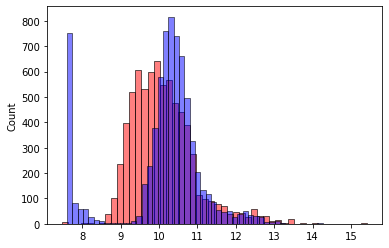

In [66]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)


## 2.9 RMSE

In [67]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

Fungsi RMSE

Fungsi `rmse` digunakan untuk menghitung Root Mean Squared Error (RMSE) antara nilai aktual dan nilai prediksi.
1. def rmse(y, y_pred):
   - Mendefinisikan fungsi `rmse` dengan dua parameter:
     - `y`: array yang berisi nilai aktual dari target.
     - `y_pred`: array yang berisi nilai prediksi dari model.
2. se = (y - y_pred) ** 2:
   - Menghitung selisih antara nilai aktual (`y`) dan nilai prediksi (`y_pred`).
   - Mengkuadratkan selisih tersebut untuk mendapatkan squared error.
3. mse = se.mean():
   - Menghitung Mean Squared Error (MSE) dengan mengambil rata-rata dari squared errors yang telah dihitung sebelumnya.
4. return np.sqrt(mse):
   - Mengembalikan nilai RMSE dengan mengambil akar kuadrat dari MSE.
Fungsi ini mengembalikan nilai RMSE, yang merupakan ukuran seberapa baik model memprediksi nilai target. Semakin kecil nilai RMSE, semakin baik model dalam melakukan prediksi.


In [68]:
rmse(y_train, y_pred)

0.7554192603920132

Menghitung RMSE

Ekspresi `rmse(y_train, y_pred)` digunakan untuk menghitung Root Mean Squared Error (RMSE) antara nilai aktual dan nilai prediksi.
1. `rmse(y_train, y_pred)`:
   - Memanggil fungsi `rmse` dengan dua argumen:
     - `y_train`: array yang berisi nilai aktual dari target untuk data pelatihan.
     - `y_pred`: array yang berisi nilai prediksi yang dihasilkan oleh model berdasarkan data pelatihan.
     
Fungsi ini bertujuan untuk mengevaluasi seberapa baik model dapat memprediksi harga (atau target) pada data pelatihan. RMSE memberikan ukuran deviasi rata-rata antara nilai aktual dan prediksi, di mana nilai yang lebih rendah menunjukkan kinerja model yang lebih baik.
Fungsi `rmse` akan mengembalikan nilai RMSE, yang dapat digunakan untuk menilai akurasi model regresi.

## 2.10 Validating the model

In [69]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

Fungsi prepare_X

Fungsi `prepare_X(df)` digunakan untuk menyiapkan data fitur (X) dari DataFrame yang diberikan.
1. `def prepare_X(df)`:
   - Mendefinisikan fungsi `prepare_X` yang menerima satu argumen, yaitu `df`, yang merupakan DataFrame.
2. `df_num = df[base]`:
   - Mengambil kolom-kolom yang terdapat dalam daftar `base` dari DataFrame `df` dan menyimpannya dalam `df_num`.
3. `df_num = df_num.fillna(0)`:
   - Mengganti nilai `NaN` dalam `df_num` dengan 0 untuk menghindari masalah saat melakukan perhitungan.
4. `X = df_num.values`:
   - Mengonversi `df_num` menjadi array NumPy dan menyimpannya dalam variabel `X`.
5. `return X`:
   - Mengembalikan nilai `X` sebagai output dari fungsi, yang berisi data fitur yang sudah dipersiapkan.

Fungsi ini bertujuan untuk menyiapkan data fitur dari DataFrame dengan memastikan tidak ada nilai yang hilang dan hanya menyertakan kolom-kolom yang relevan untuk analisis lebih lanjut.

In [70]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.7616530991301577

1. `X_train = prepare_X(df_train)`:
   - Memanggil fungsi `prepare_X` dengan argumen `df_train` untuk menyiapkan data fitur dari data pelatihan (training data). Hasilnya disimpan dalam variabel `X_train`.
2. `w0, w = train_linear_regression(X_train, y_train)`:
   - Memanggil fungsi `train_linear_regression` dengan argumen `X_train` dan `y_train`. Fungsi ini melatih model regresi linier menggunakan data fitur pelatihan dan target. Hasilnya, intercept (`w0`) dan koefisien regresi (`w`) disimpan dalam variabel terpisah.
3. `X_val = prepare_X(df_val)`:
   - Memanggil fungsi `prepare_X` dengan argumen `df_val` untuk menyiapkan data fitur dari data validasi (validation data). Hasilnya disimpan dalam variabel `X_val`.
4. `y_pred = w0 + X_val.dot(w)`:
   - Menghitung prediksi (`y_pred`) untuk data validasi dengan menggunakan model yang sudah dilatih. Ini dilakukan dengan menjumlahkan intercept (`w0`) dan hasil kali (dot product) antara `X_val` dan koefisien (`w`).
5. `rmse(y_val, y_pred)`:
   - Memanggil fungsi `rmse` untuk menghitung Root Mean Square Error (RMSE) antara nilai target yang sebenarnya (`y_val`) dan prediksi (`y_pred`). RMSE memberikan ukuran seberapa baik model dalam memprediksi nilai target untuk data validasi.
Secara keseluruhan, kode ini melakukan langkah-langkah untuk menyiapkan data pelatihan dan validasi, melatih model regresi linier, membuat prediksi untuk data validasi, dan mengevaluasi performa model menggunakan RMSE.

## 2.11 Simple feature engineering

In [71]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

Fungsi `prepare_X`

1. `def prepare_X(df):`:
   - Mendefinisikan fungsi `prepare_X` yang menerima satu parameter, `df`, yang merupakan DataFrame.
2. `df = df.copy()`:
   - Membuat salinan dari DataFrame `df` untuk memastikan bahwa modifikasi yang dilakukan pada DataFrame tidak mempengaruhi DataFrame asli.
3. `df['age'] = 2017 - df['year']`:
   - Menambahkan kolom baru bernama `age` ke DataFrame. Nilai kolom ini dihitung dengan mengurangi tahun saat ini (2017) dari nilai di kolom `year`, yang menunjukkan usia kendaraan.
4. `features = base + ['age']`:
   - Menggabungkan daftar kolom yang sudah ada dalam variabel `base` dengan kolom `age`, sehingga menghasilkan daftar kolom fitur yang akan digunakan.
5. `df_num = df[features]`:
   - Memilih hanya kolom-kolom yang terdapat dalam daftar `features` dari DataFrame dan menyimpannya dalam `df_num`.
6. `df_num = df_num.fillna(0)`:
   - Mengisi nilai `NaN` di DataFrame `df_num` dengan 0, memastikan bahwa tidak ada nilai hilang dalam data fitur.
7. `X = df_num.values`:
   - Mengambil nilai dari DataFrame `df_num` sebagai array NumPy dan menyimpannya dalam variabel `X`.
8. `return X`:
   - Mengembalikan array `X`, yang berisi data fitur yang telah diproses dan siap digunakan untuk pelatihan atau prediksi.
Fungsi ini bertujuan untuk menyiapkan data fitur dari DataFrame dengan menambahkan kolom `age`, mengisi nilai yang hilang, dan mengonversi DataFrame menjadi array NumPy, sehingga siap untuk digunakan dalam model regresi atau analisis lebih lanjut.

In [72]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.5172055461058291

1. `X_train = prepare_X(df_train)`:
   - Memanggil fungsi `prepare_X` dengan parameter `df_train` untuk menyiapkan data fitur pelatihan. Hasilnya disimpan dalam variabel `X_train`, yang berisi array NumPy dari fitur yang sudah diproses.
2. `w0, w = train_linear_regression(X_train, y_train)`:
   - Memanggil fungsi `train_linear_regression` dengan `X_train` dan `y_train` sebagai parameter. Fungsi ini akan melatih model regresi linear dan mengembalikan dua nilai: `w0` (intercept) dan `w` (koefisien fitur). Kedua nilai ini disimpan dalam variabel `w0` dan `w`.
3. `X_val = prepare_X(df_val)`:
   - Memanggil fungsi `prepare_X` lagi, kali ini dengan parameter `df_val`, untuk menyiapkan data fitur untuk set validasi. Hasilnya disimpan dalam variabel `X_val`.
4. `y_pred = w0 + X_val.dot(w)`:
   - Menghitung prediksi `y_pred` untuk set validasi. Ini dilakukan dengan menjumlahkan intercept `w0` dengan hasil kali dot antara `X_val` dan koefisien `w`. Hasilnya adalah prediksi nilai target untuk set validasi.
5. `rmse(y_val, y_pred)`:
   - Memanggil fungsi `rmse` dengan parameter `y_val` dan `y_pred` untuk menghitung nilai Root Mean Squared Error (RMSE) antara nilai aktual `y_val` dan nilai prediksi `y_pred`. Ini memberikan ukuran seberapa baik model melakukan prediksi pada data validasi.
Secara keseluruhan, kode ini bertujuan untuk melatih model regresi linear menggunakan data pelatihan dan kemudian melakukan prediksi pada data validasi. RMSE dihitung untuk mengevaluasi performa model.

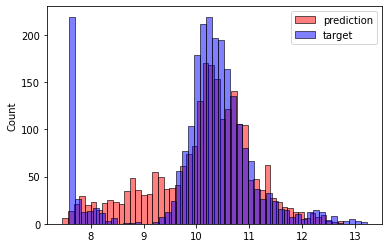

In [73]:
sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)
sns.histplot(y_val, label='target', color='blue',  alpha=0.5, bins=50)
plt.legend()

1. `sns.histplot(y_pred, label='prediction', color='red', alpha=0.5, bins=50)`:
   - Menggunakan fungsi `histplot` dari Seaborn untuk membuat histogram dari nilai prediksi `y_pred`.
   - Parameter `label='prediction'` memberikan label untuk legenda histogram ini.
   - `color='red'` mengatur warna histogram menjadi merah.
   - `alpha=0.5` menentukan transparansi histogram, sehingga memungkinkan visualisasi tumpang tindih dengan histogram lainnya.
   - `bins=50` menentukan jumlah interval (bin) untuk histogram.
2. `sns.histplot(y_val, label='target', color='blue', alpha=0.5, bins=50)`:
   - Sama dengan langkah sebelumnya, tetapi histogram ini menunjukkan nilai target `y_val`.
   - Parameter `label='target'` memberikan label untuk legenda histogram ini.
   - `color='blue'` mengatur warna histogram menjadi biru.
3. `plt.legend()`:
   - Menampilkan legenda pada plot. Ini akan menunjukkan label yang telah ditentukan untuk setiap histogram (yaitu "prediction" untuk histogram prediksi dan "target" untuk histogram nilai target).
Secara keseluruhan, kode ini bertujuan untuk membandingkan distribusi nilai prediksi model dengan distribusi nilai target sebenarnya. Dengan menggunakan histogram tumpang tindih, kita dapat secara visual mengevaluasi seberapa baik model melakukan prediksi dengan membandingkan kedua distribusi tersebut.

## 2.12 Categorical variables

In [74]:
categorical_columns = [
    'make', 'model', 'engine_fuel_type', 'driven_wheels', 'market_category',
    'vehicle_size', 'vehicle_style']

categorical = {}

for c in categorical_columns:
    categorical[c] = list(df_train[c].value_counts().head().index)

1. `categorical_columns = [...]`:
   - Mendefinisikan daftar kolom kategorikal yang akan dianalisis. Kolom-kolom ini mencakup informasi seperti merek mobil, model, jenis bahan bakar mesin, dan lainnya.
2. `categorical = {}`:
   - Membuat kamus kosong bernama `categorical`, yang akan digunakan untuk menyimpan informasi tentang nilai unik untuk setiap kolom kategorikal.
3. `for c in categorical_columns:`:
   - Memulai loop yang akan iterasi melalui setiap kolom dalam daftar `categorical_columns`.
4. `categorical[c] = list(df_train[c].value_counts().head().index)`:
   - Untuk setiap kolom `c`, menghitung jumlah nilai unik menggunakan `value_counts()`, yang mengembalikan frekuensi kemunculan setiap nilai dalam kolom tersebut.
   - `.head()` mengambil lima nilai teratas berdasarkan frekuensi kemunculan.
   - `.index` mengakses indeks dari hasil `value_counts()`, yang berisi nilai-nilai unik dari kolom tersebut.
   - `list(...)` mengubah hasilnya menjadi daftar dan menyimpannya dalam kamus `categorical` dengan nama kolom `c` sebagai kunci.
Secara keseluruhan, kode ini bertujuan untuk mengumpulkan dan menyimpan nilai-nilai unik teratas dari setiap kolom kategorikal dalam dataset pelatihan (`df_train`). Ini dapat berguna untuk analisis lebih lanjut, seperti pemilihan fitur atau eksplorasi data.

In [75]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df['year']
    features = base + ['age']

    for v in [2, 3, 4]:
        df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int)
        features.append('num_doors_%d' % v)

    for name, values in categorical.items():
        for value in values:
            df['%s_%s' % (name, value)] = (df[name] == value).astype(int)
            features.append('%s_%s' % (name, value))

    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values

    return X

1. `def prepare_X(df):`:
   - Mendefinisikan fungsi `prepare_X` yang menerima parameter `df`, yang merupakan DataFrame.
2. `df = df.copy():`:
   - Membuat salinan dari DataFrame `df` untuk menghindari perubahan langsung pada DataFrame asli.
3. `df['age'] = 2017 - df['year']:`:
   - Menambahkan kolom baru bernama `age` yang dihitung berdasarkan selisih antara tahun 2017 dan tahun yang ada di kolom `year`.
4. `features = base + ['age']:`:
   - Menggabungkan daftar `base` yang berisi nama-nama kolom fitur dengan kolom `age` untuk membentuk daftar fitur yang akan digunakan.
5. `for v in [2, 3, 4]:`:
   - Memulai loop untuk iterasi pada nilai 2, 3, dan 4, yang mewakili jumlah pintu mobil.
6. `df['num_doors_%d' % v] = (df.number_of_doors == v).astype(int):`:
   - Membuat kolom baru bernama `num_doors_<v>` untuk setiap nilai `v`, yang berisi 1 jika `number_of_doors` sama dengan `v` dan 0 jika tidak. Ini digunakan untuk mengonversi variabel kategorikal menjadi format numerik.
7. `features.append('num_doors_%d' % v):`:
   - Menambahkan nama kolom yang baru dibuat ke dalam daftar `features`.
8. `for name, values in categorical.items():`:
   - Memulai loop untuk iterasi pada setiap item dalam kamus `categorical`, di mana `name` adalah nama kolom dan `values` adalah daftar nilai unik teratas.
9. `for value in values:`:
   - Memulai loop untuk iterasi pada setiap nilai dalam `values`.
10. `df['%s_%s' % (name, value)] = (df[name] == value).astype(int):`:
    - Membuat kolom baru bernama `<name>_<value>` untuk setiap nilai `value`, yang berisi 1 jika kolom `name` sama dengan `value` dan 0 jika tidak.
11. `features.append('%s_%s' % (name, value)):`:
    - Menambahkan nama kolom yang baru dibuat ke dalam daftar `features`.
12. `df_num = df[features]:`:
    - Membuat DataFrame baru bernama `df_num` yang hanya berisi kolom-kolom yang ada dalam daftar `features`.
13. `df_num = df_num.fillna(0):`:
    - Mengisi nilai kosong (NaN) dalam `df_num` dengan 0.
14. `X = df_num.values:`:
    - Mengambil nilai-nilai dari `df_num` sebagai array NumPy dan menyimpannya dalam variabel `X`.
15. `return X:`:
    - Mengembalikan array `X` sebagai output dari fungsi.

Fungsi `prepare_X` bertujuan untuk menyiapkan fitur yang diperlukan untuk model regresi dengan melakukan pra-pemrosesan pada DataFrame, termasuk penambahan kolom baru berdasarkan informasi yang ada, konversi variabel kategorikal menjadi format numerik, dan pengisian nilai kosong.

In [76]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

266.5994263627081

1. `X_train = prepare_X(df_train):`  
   - Memanggil fungsi `prepare_X` dengan `df_train` sebagai argumen untuk menyiapkan data fitur pelatihan. Hasilnya disimpan dalam variabel `X_train`.
2. `w0, w = train_linear_regression(X_train, y_train):`  
   - Memanggil fungsi `train_linear_regression` dengan `X_train` dan `y_train` sebagai argumen untuk melatih model regresi linear. Fungsi ini mengembalikan intercept (w0) dan koefisien (w), yang kemudian disimpan dalam variabel `w0` dan `w`.
3. `X_val = prepare_X(df_val):`  
   - Memanggil fungsi `prepare_X` dengan `df_val` sebagai argumen untuk menyiapkan data fitur validasi. Hasilnya disimpan dalam variabel `X_val`.
4. `y_pred = w0 + X_val.dot(w):`  
   - Menghitung prediksi target (y_pred) untuk data validasi dengan menambahkan intercept (w0) ke hasil perkalian antara fitur validasi (`X_val`) dan koefisien regresi (`w`). Fungsi `dot` digunakan untuk melakukan operasi matriks.
5. `rmse(y_val, y_pred):`  
   - Menghitung dan mengembalikan nilai root mean square error (RMSE) antara nilai aktual (`y_val`) dan nilai prediksi (`y_pred`). RMSE digunakan untuk mengevaluasi seberapa baik model melakukan prediksi pada data validasi.


In [77]:
w0, w

(3066759258862621.0,
 array([-7.90863204e-01,  1.80621909e+02,  1.97903973e+01,  1.46968041e+01,
        -3.39713455e-04,  7.74924546e+00,  9.76297867e+03,  9.83480038e+03,
         9.77003629e+03, -2.36936868e+01, -6.98582110e+00,  7.93435108e+01,
        -7.33167695e+01, -6.60897799e+00, -1.00310530e+01,  7.79383982e+01,
        -4.19367134e+01, -6.14213575e+01,  2.12412304e+02,  1.02166851e+03,
         9.08719092e+02,  9.84633740e+02,  1.06771237e+03,  7.00547494e+02,
        -3.06675926e+15, -3.06675926e+15, -3.06675926e+15, -3.06675926e+15,
         2.52356626e+00,  3.40712703e+00, -1.27416249e+01,  1.22844560e+01,
        -1.51620939e+01,  3.09315910e+02,  2.88692636e+02,  2.78158171e+02,
        -1.44115660e-01, -2.62579827e-02,  1.75913981e-01,  3.65037816e-01,
        -2.90235596e-01]))

## 2.13 Regularization

In [78]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5.00000001],
]

X = np.array(X)
X

array([[4.        , 4.        , 4.        ],
       [3.        , 5.        , 5.        ],
       [5.        , 1.        , 1.        ],
       [5.        , 4.        , 4.        ],
       [7.        , 5.        , 5.        ],
       [4.        , 5.        , 5.00000001]])

1. `X = [[4, 4, 4], [3, 5, 5], [5, 1, 1], [5, 4, 4], [7, 5, 5], [4, 5, 5.00000001]]:`  
   - Mendefinisikan sebuah list berisi beberapa list, masing-masing merepresentasikan sebuah baris dengan tiga fitur.
2. `X = np.array(X):`  
   - Mengubah list `X` menjadi array NumPy. Ini memungkinkan penggunaan fungsi dan operasi yang lebih efisien pada data numerik.  
3. `X:`  
   - Menampilkan array NumPy yang dihasilkan. Array ini akan berisi data sebagai berikut:

In [79]:
y= [1, 2, 3, 1, 2, 3]

1. `y = [1, 2, 3, 1, 2, 3]:`  
   - Mendefinisikan sebuah list bernama `y` yang berisi enam elemen. Elemen-elemen ini merupakan angka bulat yang dapat digunakan sebagai target atau label dalam analisis data atau pemodelan.

In [80]:
XTX = X.T.dot(X)
XTX

array([[140.        , 111.        , 111.00000004],
       [111.        , 108.        , 108.00000005],
       [111.00000004, 108.00000005, 108.0000001 ]])

1. `XTX = X.T.dot(X):`  
   - Menghitung hasil kali dari matriks `X` yang ditransposisi (X.T) dengan matriks `X` itu sendiri. Proses ini menghasilkan matriks baru bernama `XTX`, yang sering digunakan dalam konteks regresi linier untuk menghitung koefisien model.
   - Operasi ini berguna dalam regresi untuk mendapatkan informasi tentang variabilitas dan hubungan antara fitur-fitur dalam matriks `X`.

In [81]:
XTX_inv = np.linalg.inv(XTX)

1. `XTX_inv = np.linalg.inv(XTX):`  
   - Menghitung invers dari matriks `XTX` yang telah dihitung sebelumnya. Fungsi `np.linalg.inv()` digunakan untuk menemukan invers matriks.
   - Invers dari matriks ini diperlukan dalam konteks regresi linier untuk menentukan koefisien model. Dengan menggunakan invers matriks, kita dapat menghitung estimasi koefisien regresi yang meminimalkan kesalahan kuadrat.
   - Jika matriks `XTX` tidak dapat diinversi (misalnya, jika matriks tersebut singular), maka proses ini akan menghasilkan kesalahan.

In [82]:
XTX_inv

array([[ 3.85321698e-02,  1.20696663e+05, -1.20696696e+05],
       [ 1.20696640e+05, -2.74658839e+14,  2.74658839e+14],
       [-1.20696680e+05,  2.74658839e+14, -2.74658839e+14]])

In [83]:
XTX_inv.dot(X.T).dot(y)

array([ 6.24269892e-01,  3.44329390e+06, -3.44329299e+06])

1. `XTX_inv.dot(X.T).dot(y):`  
   - Menghitung estimasi koefisien regresi linier menggunakan rumus normal equation. Proses ini dilakukan dalam dua langkah:
     - `XTX_inv.dot(X.T)` menghitung hasil kali antara invers dari matriks `XTX` dan transpos dari matriks `X`. Ini menghasilkan matriks yang akan digunakan untuk menghitung koefisien.
     - Kemudian, hasil tersebut dikalikan dengan `y`, yaitu vektor target yang berisi nilai-nilai yang ingin diprediksi.
   - Hasil akhir dari operasi ini adalah vektor `w_full`, yang berisi estimasi untuk koefisien regresi, termasuk intercept (bias) dan koefisien untuk setiap fitur.
   - Proses ini sangat efisien dan sering digunakan dalam regresi linier karena memberikan solusi langsung tanpa perlu melakukan iterasi.

In [84]:
XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)

1. `XTX = np.array(XTX):`  
   - Membuat matriks `XTX` sebagai objek NumPy array. 
   - Matriks ini memiliki dimensi 3x3 dan berisi nilai-nilai sebagai berikut:
     - Baris pertama: `[1, 2, 2]`
     - Baris kedua: `[2, 1, 1.0000001]`
     - Baris ketiga: `[2, 1.0000001, 1]`
   - Matriks ini biasanya digunakan dalam konteks regresi linier, khususnya dalam perhitungan koefisien regresi menggunakan metode normal equation.
   - Penggunaan `np.array()` memastikan bahwa matriks tersebut dapat digunakan untuk operasi numerik yang efisien dengan NumPy.

In [85]:
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

1. `np.linalg.inv(XTX):`  
   - Menghitung invers dari matriks `XTX` yang telah didefinisikan sebelumnya.
   - `np.linalg.inv()` adalah fungsi dari library NumPy yang digunakan untuk menghitung invers matriks.
   - Matriks `XTX` yang akan dihitung inversnya memiliki dimensi 3x3, dan fungsi ini akan mengembalikan matriks invers yang juga berdimensi 3x3.
   - Invers matriks sering digunakan dalam konteks regresi linier untuk menghitung koefisien regresi menggunakan rumus normal equation.

In [86]:
XTX = XTX + 0.01 * np.eye(3)

1. `XTX = XTX + 0.01 * np.eye(3):`  
   - Baris kode ini menambahkan nilai kecil (0.01) ke diagonal matriks `XTX` untuk menghasilkan stabilitas numerik.
   - `np.eye(3)` adalah fungsi dari NumPy yang menghasilkan matriks identitas berukuran 3x3. Matriks identitas memiliki 1 di diagonal utama dan 0 di elemen lainnya.
   - Dengan mengalikan `np.eye(3)` dengan 0.01, kita mendapatkan matriks dengan 0.01 di diagonal dan 0 di tempat lainnya.
   - Penambahan ini sering dilakukan dalam konteks regresi linier untuk menghindari masalah yang terkait dengan matriks singular atau hampir singular saat menghitung inversnya.

In [87]:
np.linalg.inv(XTX)

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

1. `np.linalg.inv(XTX):`  
   - Baris kode ini digunakan untuk menghitung invers dari matriks `XTX`.
   - `np.linalg.inv()` adalah fungsi dari NumPy yang mengembalikan invers dari sebuah matriks.
   - Matriks `XTX` harus berupa matriks persegi dan harus memiliki determinan yang tidak sama dengan nol untuk inversnya dapat dihitung. 
   - Jika `XTX` telah ditambahkan dengan nilai kecil pada diagonal sebelumnya (seperti yang dilakukan pada langkah sebelumnya), hal ini membantu menghindari kesalahan ketika matriks hampir singular, sehingga perhitungan invers dapat dilakukan dengan lebih stabil.


In [88]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

1. `def train_linear_regression_reg(X, y, r=0.001):`  
   - Fungsi ini didefinisikan untuk melatih model regresi linier dengan regularisasi L2 (Ridge Regression). Parameter `X` adalah fitur input, `y` adalah target output, dan `r` adalah koefisien regularisasi yang default-nya diatur ke 0.001.
2. `ones = np.ones(X.shape[0]):`  
   - Baris ini membuat array `ones` yang berisi angka 1 dengan jumlah elemen sama dengan jumlah baris dalam `X`. Ini digunakan untuk menambahkan bias ke model.
3. `X = np.column_stack([ones, X]):`  
   - Menggabungkan kolom `ones` dengan `X` untuk membentuk matriks baru yang mencakup bias.
4. `XTX = X.T.dot(X):`  
   - Menghitung produk dari transpos matriks `X` dengan matriks `X` itu sendiri. Ini menghasilkan matriks yang diperlukan untuk menghitung koefisien model.
5. `XTX = XTX + r * np.eye(XTX.shape[0]):`  
   - Menambahkan `r` dikalikan dengan matriks identitas ke `XTX` untuk mengimplementasikan regularisasi L2. Ini membantu mencegah overfitting dengan mengurangi kompleksitas model.
6. `XTX_inv = np.linalg.inv(XTX):`  
   - Menghitung invers dari matriks `XTX`. Ini diperlukan untuk menghitung koefisien regresi.
7. `w_full = XTX_inv.dot(X.T).dot(y):`  
   - Menghitung koefisien regresi menggunakan formula closed-form, yaitu mengalikan invers dari `XTX` dengan transpos `X` dan kemudian dengan `y`.
8. `return w_full[0], w_full[1:]:`  
   - Mengembalikan dua nilai: koefisien untuk bias (`w_full[0]`) dan koefisien untuk fitur (`w_full[1:]`).

In [89]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred)

0.4608208286209523

1. `X_train = prepare_X(df_train):`  
   - Menggunakan fungsi `prepare_X` untuk menyiapkan data fitur dari `df_train`. Data ini akan digunakan untuk melatih model regresi.
2. `w0, w = train_linear_regression_reg(X_train, y_train, r=0.01):`  
   - Melatih model regresi linier dengan regularisasi L2 menggunakan data pelatihan (`X_train` dan `y_train`) dan koefisien regularisasi `r` yang diatur ke 0.01. Hasilnya adalah `w0`, yang merupakan koefisien bias, dan `w`, yang merupakan koefisien untuk fitur.
3. `X_val = prepare_X(df_val):`  
   - Menyiapkan data fitur dari `df_val` dengan menggunakan fungsi yang sama untuk mempersiapkan data validasi. Data ini akan digunakan untuk mengukur kinerja model.
4. `y_pred = w0 + X_val.dot(w):`  
   - Menghitung prediksi (`y_pred`) dengan menjumlahkan bias (`w0`) dan hasil dari perkalian matriks antara `X_val` dan koefisien fitur (`w`). Ini memberikan nilai prediksi untuk data validasi.
5. `rmse(y_val, y_pred):`  
   - Menghitung Root Mean Square Error (RMSE) antara nilai sebenarnya (`y_val`) dan nilai prediksi (`y_pred`). RMSE adalah metrik yang digunakan untuk mengukur seberapa baik model regresi bekerja.


## 2.14 Tuning the model

In [90]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 3066759258862621.0 266.5994263627081
1e-05 6.6398149018651305 0.46081532123609276
0.0001 7.12965014007955 0.4608153659783837
0.001 7.13085491393288 0.46081585838957173
0.1 7.0002324128629025 0.4608736549134577
1 6.250747846974607 0.46158128382779856
10 4.7295125856710305 0.472609877266903


1. `for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:`  
   - Melakukan iterasi untuk setiap nilai dari koefisien regularisasi `r`. Daftar nilai yang digunakan adalah 0.0, 0.00001, 0.0001, 0.001, 0.1, 1, dan 10.
2. `X_train = prepare_X(df_train):`  
   - Menggunakan fungsi `prepare_X` untuk menyiapkan data fitur dari `df_train` untuk setiap iterasi. Ini akan digunakan untuk melatih model regresi.
3. `w0, w = train_linear_regression_reg(X_train, y_train, r=r):`  
   - Melatih model regresi linier dengan regularisasi L2 menggunakan data pelatihan (`X_train` dan `y_train`) dan nilai regularisasi `r` yang sedang diproses. Hasilnya adalah `w0`, yang merupakan koefisien bias, dan `w`, yang merupakan koefisien untuk fitur.
4. `X_val = prepare_X(df_val):`  
   - Menyiapkan data fitur dari `df_val` dengan menggunakan fungsi yang sama untuk mempersiapkan data validasi. Data ini akan digunakan untuk mengukur kinerja model.
5. `y_pred = w0 + X_val.dot(w):`  
   - Menghitung prediksi (`y_pred`) dengan menjumlahkan bias (`w0`) dan hasil dari perkalian matriks antara `X_val` dan koefisien fitur (`w`). Ini memberikan nilai prediksi untuk data validasi.
6. `score = rmse(y_val, y_pred):`  
   - Menghitung Root Mean Square Error (RMSE) antara nilai sebenarnya (`y_val`) dan nilai prediksi (`y_pred`). RMSE adalah metrik yang digunakan untuk mengukur seberapa baik model regresi bekerja.
7. `print(r, w0, score):`  
   - Mencetak nilai `r`, koefisien bias `w0`, dan skor RMSE untuk setiap iterasi, memberikan wawasan tentang bagaimana perubahan nilai regularisasi mempengaruhi hasil model.

In [91]:
r = 0.001
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

0.46081585838957173

1. `r = 0.001:`  
   - Menetapkan nilai koefisien regularisasi `r` sebesar 0.001. Nilai ini akan digunakan dalam proses pelatihan model untuk menghindari overfitting dengan memberikan penalti pada nilai koefisien yang besar.
2. `X_train = prepare_X(df_train):`  
   - Memanggil fungsi `prepare_X` untuk mempersiapkan data fitur dari dataset pelatihan (`df_train`). Fungsi ini akan mengisi nilai yang hilang dan menambahkan fitur yang diperlukan, seperti usia kendaraan.
3. `w0, w = train_linear_regression_reg(X_train, y_train, r=r):`  
   - Melatih model regresi linier dengan menggunakan fungsi `train_linear_regression_reg`. Model ini dilatih pada data pelatihan (`X_train` dan `y_train`) dengan menerapkan regularisasi L2 menggunakan nilai `r` yang telah ditentukan. Hasil dari fungsi ini adalah `w0`, yang merupakan koefisien bias, dan `w`, yang merupakan koefisien untuk fitur lainnya.
4. `X_val = prepare_X(df_val):`  
   - Memanggil fungsi `prepare_X` untuk mempersiapkan data fitur dari dataset validasi (`df_val`). Proses ini sama dengan yang dilakukan untuk data pelatihan, sehingga data validasi juga siap untuk digunakan dalam evaluasi model.
5. `y_pred = w0 + X_val.dot(w):`  
   - Menghitung nilai prediksi (`y_pred`) dengan menjumlahkan koefisien bias (`w0`) dan hasil perkalian matriks antara `X_val` dan koefisien fitur (`w`). Ini menghasilkan nilai yang diprediksi untuk data validasi berdasarkan model yang telah dilatih.
6. `score = rmse(y_val, y_pred):`  
   - Menghitung Root Mean Square Error (RMSE) antara nilai sebenarnya (`y_val`) dan nilai yang diprediksi (`y_pred`). RMSE memberikan ukuran seberapa baik model dapat memprediksi nilai target pada data validasi.
7. `score:`  
   - Mengembalikan nilai `score`, yang merupakan RMSE untuk evaluasi model. Nilai ini dapat digunakan untuk menentukan seberapa baik kinerja model regresi linier yang telah dilatih dengan regularisasi.


## 2.15 Using the model

In [92]:
df_full_train = pd.concat([df_train, df_val])

1. `df_full_train = pd.concat([df_train, df_val]):`  
   - Menggunakan fungsi `pd.concat` dari library Pandas untuk menggabungkan dua DataFrame, yaitu `df_train` dan `df_val`. 
   - Hasil dari penggabungan ini adalah DataFrame baru yang disebut `df_full_train`, yang berisi semua baris dari `df_train` dan `df_val`. 
   - Penggabungan ini berguna ketika kita ingin melatih model menggunakan seluruh data yang tersedia, baik dari pelatihan maupun validasi, untuk mendapatkan informasi yang lebih banyak dan meningkatkan akurasi model.

In [93]:
df_full_train = df_full_train.reset_index(drop=True)

1. `df_full_train = df_full_train.reset_index(drop=True):`  
   - Menggunakan metode `reset_index` dari Pandas untuk mengatur ulang indeks DataFrame `df_full_train`. 
   - Parameter `drop=True` digunakan untuk menghapus indeks lama, sehingga tidak akan ditambahkan sebagai kolom baru dalam DataFrame.
   - Ini berguna untuk memastikan bahwa indeks DataFrame baru berurutan dari 0 hingga n-1, di mana n adalah jumlah baris dalam DataFrame, dan membantu menjaga konsistensi dalam pemrosesan data selanjutnya.

In [94]:
X_full_train = prepare_X(df_full_train)

1. `X_full_train = prepare_X(df_full_train):`  
   - Memanggil fungsi `prepare_X` dengan argumen `df_full_train`, yang merupakan DataFrame yang telah digabung dari `df_train` dan `df_val`.
   - Fungsi `prepare_X` digunakan untuk menyiapkan data fitur (X) dengan melakukan beberapa langkah, seperti:
     - Menghitung umur kendaraan berdasarkan tahun.
     - Menangani nilai yang hilang dengan mengisi nilai nol.
     - Mengonversi variabel kategori menjadi format numerik dengan membuat kolom dummy.
   - Hasil dari pemanggilan fungsi ini adalah array NumPy yang berisi fitur yang telah dipersiapkan untuk model regresi.

In [95]:
X_full_train

array([[148.,   4.,  33., ...,   1.,   0.,   0.],
       [132.,   4.,  32., ...,   0.,   0.,   1.],
       [148.,   4.,  37., ...,   0.,   0.,   1.],
       ...,
       [332.,   8.,  23., ...,   0.,   0.,   0.],
       [148.,   4.,  34., ...,   0.,   0.,   0.],
       [290.,   6.,  25., ...,   0.,   0.,   0.]])

In [96]:
y_full_train = np.concatenate([y_train, y_val])

1. `y_full_train = np.concatenate([y_train, y_val]):`  
   - Menggunakan fungsi `np.concatenate` untuk menggabungkan dua array NumPy, `y_train` dan `y_val`.
   - `y_train` berisi target atau label dari data pelatihan, sedangkan `y_val` berisi target dari data validasi.
   - Hasilnya adalah `y_full_train`, yang merupakan array satu dimensi yang mengandung semua label target dari data pelatihan dan validasi. Ini digunakan untuk melatih model pada seluruh dataset.

In [97]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

1. `w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001):`  
   - Memanggil fungsi `train_linear_regression_reg` dengan argumen `X_full_train`, `y_full_train`, dan `r=0.001`.
   - `X_full_train` adalah fitur dari data pelatihan lengkap yang telah dipersiapkan sebelumnya, mencakup data dari `df_train` dan `df_val`.
   - `y_full_train` adalah label target yang merupakan gabungan dari `y_train` dan `y_val`.
   - `r=0.001` adalah nilai regularisasi yang ditambahkan untuk mencegah overfitting pada model.
   - Fungsi ini mengembalikan dua nilai: `w0`, yang merupakan intercept dari regresi linier, dan `w`, yang merupakan koefisien regresi untuk setiap fitur. Koefisien ini digunakan untuk membuat prediksi berdasarkan fitur yang diberikan.

In [98]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.4600753970266562

1. `X_test = prepare_X(df_test):`  
   - Memanggil fungsi `prepare_X` dengan argumen `df_test`, yang merupakan dataset pengujian.
   - Fungsi ini mempersiapkan fitur dari `df_test` dengan cara yang sama seperti pada data pelatihan, termasuk menangani nilai yang hilang dan menambahkan fitur baru seperti `age` dan encoding untuk variabel kategorikal.
   - Hasilnya adalah array `X_test` yang berisi fitur-fitur yang akan digunakan untuk membuat prediksi.
2. `y_pred = w0 + X_test.dot(w):`  
   - Menghitung prediksi target `y_pred` menggunakan rumus regresi linier.
   - `X_test.dot(w)` menghitung produk titik antara fitur pengujian dan koefisien regresi `w`.
   - Kemudian, menambahkan intercept `w0` untuk mendapatkan nilai prediksi akhir.
3. `score = rmse(y_test, y_pred):`  
   - Menghitung root mean square error (RMSE) antara nilai aktual `y_test` dan prediksi `y_pred`.
   - RMSE adalah ukuran seberapa jauh prediksi model dari nilai aktualnya, di mana nilai yang lebih rendah menunjukkan model yang lebih baik.
4. `score:`  
   - Mengembalikan nilai RMSE yang dihitung, yang memberikan indikasi seberapa baik model melakukan prediksi pada dataset pengujian.

In [99]:
car = df_test.iloc[20].to_dict()
car

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

1. `car = df_test.iloc[20].to_dict():`  
   - Menggunakan `iloc` untuk mengakses baris ke-20 dari DataFrame `df_test`. 
   - `iloc` memungkinkan akses baris berdasarkan indeks numerik.
   - Setelah itu, metode `to_dict()` dipanggil untuk mengonversi baris tersebut menjadi dictionary.
   - Hasilnya adalah objek `car` yang merupakan dictionary, di mana kunci adalah nama kolom dari DataFrame dan nilai adalah data dari baris tersebut.
2. `car:`  
   - Mengembalikan dictionary yang berisi informasi lengkap tentang mobil pada baris ke-20 dari dataset pengujian.

In [100]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


1. `df_small = pd.DataFrame([car]):`  
   - Membuat DataFrame baru bernama `df_small` dengan menggunakan konstruktor `pd.DataFrame()`.
   - DataFrame ini diisi dengan satu elemen yang merupakan list yang berisi dictionary `car`.
   - Dengan cara ini, dictionary `car` yang berisi informasi tentang mobil diubah menjadi format DataFrame, di mana setiap kunci dalam dictionary menjadi kolom dalam DataFrame.
2. `df_small:`  
   - Menghasilkan DataFrame `df_small` yang hanya memiliki satu baris, yang berisi data dari `car`. 
   - Setiap kolom di `df_small` sesuai dengan kolom yang ada di dictionary `car`.

In [101]:
X_small = prepare_X(df_small)

1. `X_small = prepare_X(df_small):`  
   - Memanggil fungsi `prepare_X()` dengan parameter `df_small`, yang merupakan DataFrame berisi informasi tentang satu mobil.
   - Fungsi `prepare_X()` digunakan untuk mempersiapkan data yang diperlukan untuk regresi linear dengan mengubah DataFrame menjadi array NumPy.
   - Dalam fungsi ini, beberapa langkah dilakukan, seperti menghitung usia mobil, menangani fitur kategorikal, dan mengisi nilai yang hilang.
   - Hasil dari fungsi ini adalah `X_small`, yang berisi fitur numerik dari mobil dalam format array NumPy yang dapat digunakan untuk prediksi.

In [102]:
y_pred = w0 + X_small.dot(w)
y_pred = y_pred[0]
y_pred

10.63249250912739

1. `y_pred = w0 + X_small.dot(w):`  
   - Menghitung prediksi harga mobil menggunakan model regresi linear yang telah dilatih.
   - Di sini, `X_small` adalah array yang berisi fitur dari mobil yang ingin diprediksi, dan `w` adalah bobot yang diperoleh dari model.
   - Proses ini dilakukan dengan melakukan operasi dot product antara `X_small` dan `w`, kemudian menambahkan `w0`, yang merupakan intercept dari model.
   - Hasil dari perhitungan ini adalah `y_pred`, yang merupakan prediksi harga mobil berdasarkan fitur yang diberikan.
2. `y_pred = y_pred[0]:`  
   - Mengambil nilai pertama dari `y_pred`, karena hasil dari operasi sebelumnya menghasilkan array, dan kita hanya membutuhkan nilai prediksi tunggal untuk mobil tersebut.
   - `y_pred` sekarang berisi prediksi harga mobil dalam bentuk skalar.

In [103]:
np.expm1(y_pred)

41459.336786653585

1. `np.expm1(y_pred):`  
   - Fungsi ini digunakan untuk menghitung \( e^{x} - 1 \) dari nilai `y_pred`.
   - Fungsi `np.expm1` lebih efisien daripada menggunakan `np.exp(y_pred) - 1`, terutama untuk nilai `y_pred` yang mendekati nol, karena menghindari masalah presisi numerik.
   - Hasil dari fungsi ini adalah nilai yang telah dikalikan dengan konstanta \( e \) (basis dari logaritma natural) dikurangi 1.
   - Ini sering digunakan dalam konteks regresi yang menggunakan transformasi logaritmik, di mana hasil prediksi perlu dikembalikan ke skala aslinya.

In [104]:
np.expm1(y_test[20])

35000.00000000001

1. `np.expm1(y_test[20]):`  
   - Fungsi ini menghitung \( e^{y_{\text{test}}[20]} - 1 \).
   - `y_test[20]` mengacu pada nilai ke-21 dalam array atau daftar `y_test`.
   - Sama seperti sebelumnya, fungsi `np.expm1` digunakan untuk menghindari masalah presisi numerik ketika \( y_{\text{test}}[20] \) dekat dengan nol.
   - Hasilnya adalah nilai asli setelah transformasi logaritmik dikembalikan ke skala aslinya, sangat berguna dalam analisis regresi untuk interpretasi hasil.

## 2.16 Next steps

* We included only 5 top features. What happens if we include 10?

Other projects

* Predict the price of a house - e.g. boston dataset
* https://archive.ics.uci.edu/ml/datasets.php?task=reg
* https://archive.ics.uci.edu/ml/datasets/Student+Performance

## 2.17 Summary

* EDA - looking at data, finding missing values
* Target variable distribution - long tail => bell shaped curve
* Validation framework: train/val/test split (helped us detect problems)
* Normal equation - not magic, but math
* Implemented it with numpy
* RMSE to validate our model
* Feature engineering: age, categorical features
* Regularization to fight numerical instability

1. Import library yang diperlukan (NumPy, Pandas, Seaborn).
2. Muat dataset ke dalam DataFrame.
3. Identifikasi fitur numerik dan kategorikal.
4. Pra-pemrosesan data:
   - Mengisi nilai yang hilang.
   - Menambahkan fitur baru (age).
   - Membuat variabel dummy untuk kolom kategorikal.
5. Persiapkan matriks fitur (X) dan target (y) untuk data pelatihan dan validasi.
6. Melatih model regresi linear:
   - Hitung bobot dengan `train_linear_regression` atau `train_linear_regression_reg` (dengan regularisasi).
7. Evaluasi model:
   - Hitung prediksi pada data validasi dan uji.
   - Hitung RMSE untuk menilai kinerja model.
8. Gabungkan data pelatihan dan validasi untuk pelatihan akhir.
9. Buat prediksi untuk data uji.
10. Lakukan prediksi individual untuk entri tertentu dan kembalikan ke skala asli.


## Ringkasan Proses Regresi Linear

### Persiapan Data:
- Mengimpor pustaka yang diperlukan, termasuk NumPy dan Pandas.
- Memuat dataset yang berisi informasi tentang mobil atau fitur yang relevan.
- Mengidentifikasi kolom fitur yang akan digunakan dalam model regresi.

### Pra-Pemrosesan:
- Mengisi nilai yang hilang dalam dataset dengan nol.
- Menghitung fitur baru, seperti usia kendaraan berdasarkan tahun pembuatan.
- Membuat variabel dummy untuk fitur kategorikal.

### Membangun Model Regresi Linear:
- Membangun fungsi `train_linear_regression` untuk menghitung bobot model (koefisien) menggunakan metode Least Squares.
- Mengimplementasikan regularisasi dengan fungsi `train_linear_regression_reg` untuk menangani multikolinearitas dengan menambahkan parameter regularisasi (r).

### Pelatihan Model:
- Mempersiapkan matriks fitur (X) dan target (y) dari data pelatihan dan validasi.
- Melatih model dengan data pelatihan dan validasi.
- Menghitung prediksi menggunakan model yang dilatih dan menghitung kesalahan menggunakan fungsi RMSE (Root Mean Square Error).

### Evaluasi Model:
- Menggunakan data pelatihan penuh (gabungan data pelatihan dan validasi) untuk melatih model akhir.
- Menghitung prediksi pada dataset uji dan menghitung skor RMSE untuk mengevaluasi kinerja model.

### Prediksi Individual:
- Mengambil satu entri dari data uji untuk melakukan prediksi individual.
- Menghitung nilai prediksi dan mengembalikannya ke skala aslinya dengan menggunakan fungsi `np.expm1`.


### Workflow
1. Import library yang diperlukan (NumPy, Pandas, Seaborn).
2. Muat dataset ke dalam DataFrame.
3. Identifikasi fitur numerik dan kategorikal.
4. Pra-pemrosesan data:
   - Mengisi nilai yang hilang.
   - Menambahkan fitur baru (age).
   - Membuat variabel dummy untuk kolom kategorikal.
5. Persiapkan matriks fitur (X) dan target (y) untuk data pelatihan dan validasi.
6. Melatih model regresi linear:
   - Hitung bobot dengan `train_linear_regression` atau `train_linear_regression_reg` (dengan regularisasi).
7. Evaluasi model:
   - Hitung prediksi pada data validasi dan uji.
   - Hitung RMSE untuk menilai kinerja model.
8. Gabungkan data pelatihan dan validasi untuk pelatihan akhir.
9. Buat prediksi untuk data uji.
10. Lakukan prediksi individual untuk entri tertentu dan kembalikan ke skala asli.
